# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Modles

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= "./data/NCDC/us/baltimore/dat.txt" # time too short

# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # 4?
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt' # high 0
# ipath= './data/NCDC/uk/bournemouth/dat.txt' 4?
# ipath= './data/NCDC/uk/tiree/dat.txt'  # try 4
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # 
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
# ipath= './data/NCDC/uk/marham/dat.txt' 
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # 4 or 5?
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # 2010-2014 has problem
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good

# ipath= "./data/NCDC/canada/melita_man/dat.txt" # 
ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt" # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/argentia/dat.txt" 

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s)
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer with less data, use m/s
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Weird KDE shape, 4?
# ipath= "./data/NCDC/oceania/canberra/dat.txt" # high 0

# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= "./data/NCDC/cn/tianjing/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/tianjing/tianjing/dat.txt" # 16 sectors
# ipath= "./data/NCDC/cn/hefei_luogang/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" 
# ipath= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# ipath= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # fit is not good
# ipath= "./data/NCDC/cn/nanning_wuxu/dat.txt" # recent 5 year has problem
# ipath= './data/NCDC/cn/macau/dat.txt'  
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # few initial data

# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20160000) ")

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


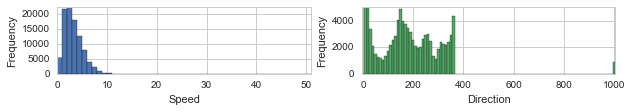

In [4]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [5]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date          HrMn           dir         speed         month  \
count  9.531400e+04  95314.000000  95314.000000  95314.000000  95314.000000   
mean   2.007475e+07   1111.510387    193.884498      3.076538      6.820551   
std    6.597501e+04    694.904430    127.135760      1.919589      3.404589   
min    1.994010e+07      0.000000      0.000000      0.000000      1.000000   
25%    2.005052e+07    500.000000     90.000000      1.500000      4.000000   
50%    2.009082e+07   1100.000000    190.000000      2.600000      7.000000   
75%    2.012122e+07   1700.000000    280.000000      4.100000     10.000000   
max    2.015123e+07   2300.000000    999.000000     50.900000     12.000000   

       dir_windrose  
count  95314.000000  
mean     171.990232  
std      131.896797  
min        0.000000  
25%       80.000000  
50%      160.000000  
75%      250.000000  
max      999.000000

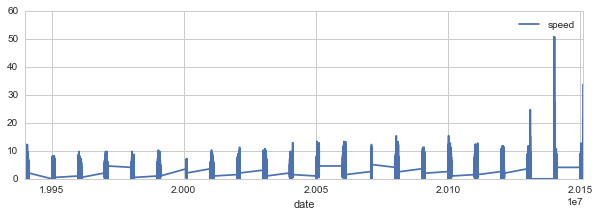

In [6]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


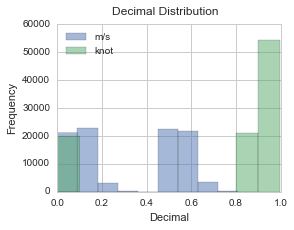

In [7]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False

# knot_unit = False

if knot_unit:
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    df['speed'] = df['speed'].apply(lambda x: int(round(x)))
plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')

print(knot_unit)

### 1.2.2 Sampling Type Selection

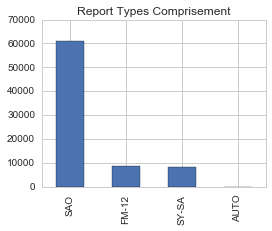

In [8]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

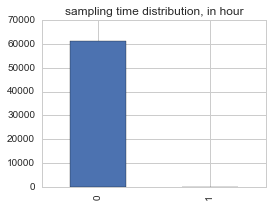

In [9]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution, in hour', figsize=(4,3))

# Need more elaboration
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# sample_times =  [sample_times.index[0]]
df = df.query("sample_time in @sample_times")
df.drop(['sample_time'], 1,inplace=True)

In [10]:
df['HrMn'].value_counts().sort_index()

0        678
100     3371
200     3386
300     3374
400     3390
500     3388
600      730
700     3360
800     3376
900     3377
1000    3383
1100    3381
1200     757
1300    3355
1400    3376
1500    3369
1600    3367
1700    3382
1800     715
1900    3337
2000    3367
2100    3378
2200    3376
2300    3383
Name: HrMn, dtype: int64

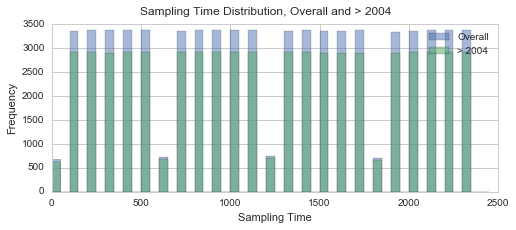

In [11]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(0, 2400+100, 50)

df['HrMn'].plot(kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [12]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose, decimal]
Index: []

#### 1.3.1.2 sudden increase in speed

date  HrMn type  dir  speed wind_type  month  dir_windrose  \
81539  20140210   600  SAO  290     99         9      2           160   
81541  20140210   800  SAO  350     99         9      2           100   
81515  20140209   600  SAO  250     99         9      2           200   
81542  20140210   900  SAO  230     98         9      2           220   
81543  20140210  1000  SAO  250     97         9      2           200   
81516  20140209   700  SAO  260     92         9      2           190   
81564  20140211  1200  SAO  340     91         9      2           110   
96774  20151226  1200  SAO  270     66         9     12           180   
96773  20151226  1100  SAO    0     62         9     12            90   
81616  20140213  1700  SAO   90     54         9      2             0   

        decimal  incre  incre_reverse  
81539  0.941710   64.0           88.0  
81541  0.941710   88.0            1.0  
81515  0.941710   79.0            7.0  
81542  0.969788   -1.0            1.0  
81543  0.997866   -1.0           83.0  
81516  0.943868   -7.0           80.0  
81564  0.971946   53.0           56.0  
96774  0.896345    4.0           51.0  
96773  0.008655   59.0           -4.0  
81616  0.038891   44.0           52.0

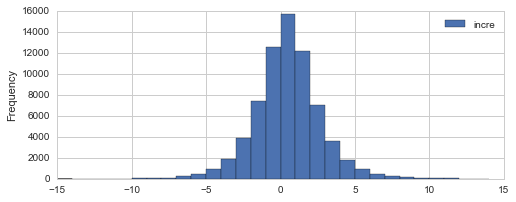

In [13]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [14]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

('sudden increase number', 18)


After Simple Aretefacts Handling

In [15]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

date  HrMn type  dir  speed wind_type  month  dir_windrose  \
81541  20140210   800  SAO  350     99         9      2           100   
81515  20140209   600  SAO  250     99         9      2           200   
81542  20140210   900  SAO  230     98         9      2           220   
81543  20140210  1000  SAO  250     97         9      2           200   
81516  20140209   700  SAO  260     92         9      2           190   
96774  20151226  1200  SAO  270     66         9     12           180   
96773  20151226  1100  SAO    0     62         9     12            90   
81562  20140211   900  SAO  120     53         9      2           330   
81626  20140214   300  SAO  240     39         9      2           210   
96737  20151224  2300  SAO  300     39         9     12           150   

        decimal  incre  incre_reverse  
81541  0.941710   88.0            1.0  
81515  0.941710   79.0            7.0  
81542  0.969788   -1.0            1.0  
81543  0.997866   -1.0           83.0  
81516  0.943868   -7.0           80.0  
96774  0.896345    4.0           51.0  
96773  0.008655   59.0           -4.0  
81562  0.872584   48.0           15.0  
81626  0.876900   37.0            3.0  
96737  0.876900   36.0            3.0

### 1.3.2 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [16]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print(len(effective_column), SECTOR_LENGTH)

0       825
10      657
20      780
30      869
40     1093
50     1635
60     2610
70     3822
80     3866
90     3357
100    2147
110    1685
120    1483
130    1477
140    1754
150    1297
160     743
170     977
180    1842
190    2367
200    2303
210    1971
220    1463
230    1403
240    1435
250    1795
260    2361
270    2672
280    2897
290    3068
300    3747
310    3065
320    2069
330    1731
340    1419
350    1112
999     538
Name: dir, dtype: int64

(36, 10.0)


In [17]:
df=realign_direction(df, effective_column)

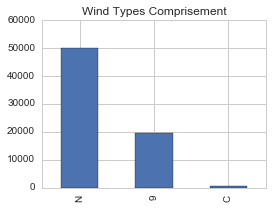

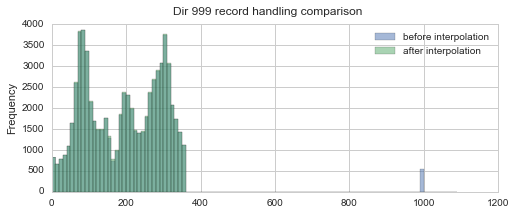

In [18]:
df=fill_direction_999(df, SECTOR_LENGTH)

### 1.3.3 Time Shift Comparison

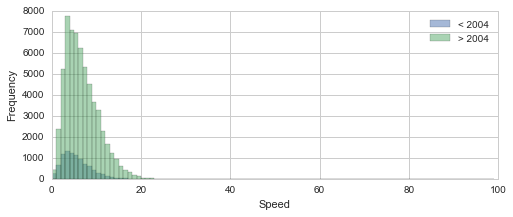

In [19]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

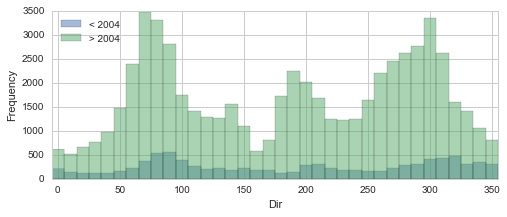

In [20]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1994 - 1994


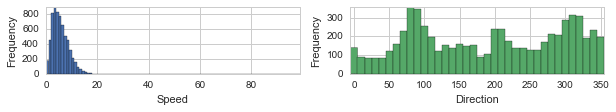

1995 - 1995


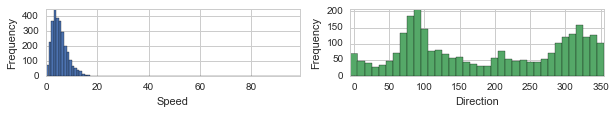

2006 - 2009


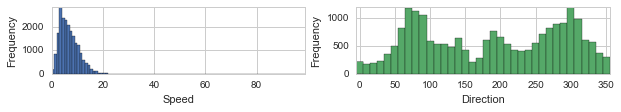

2010 - 2014


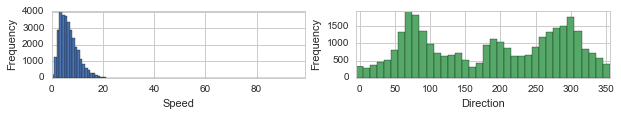

2015 - 2015


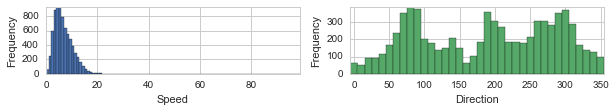

In [21]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

### 1.3.4 0 Speed

In [22]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

(False, 0.0069864698646986472)


## 1.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

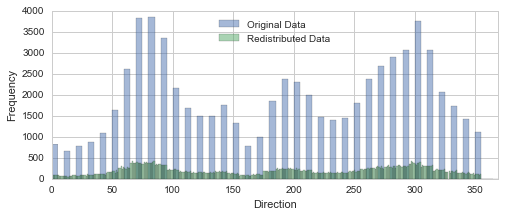

In [23]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


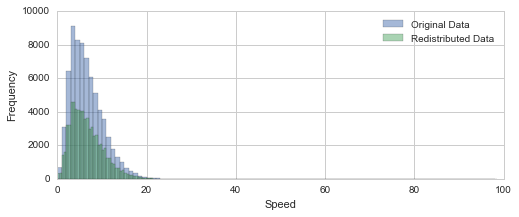

In [24]:
if delete_zero:
    redistribute_method = 'round_down'
else:
    redistribute_method = 'round_up'
df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.5 Generate (x,y) from (speed,dir)

In [25]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [26]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Configs

## 2.1 Data Overview

In [27]:
## Summery of the data selection
print 'Knot unit?', knot_unit
print 'Incre_threshold for artefact detection:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sample_times
print 'delete_zero?', delete_zero
if 'speed_redistribution_info' in globals():
    print 'Speed redistribution info:', speed_redistribution_info 

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Incre_threshold for artefact detection: 20
Report type used: SAO
Sampling time used: [0]
delete_zero? False
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  3.218000e+04  32180.000000  32180.000000  32180.000000  32180.000000   
mean   2.012345e+07   1184.173400    185.145255      6.734468      6.711778   
std    1.292997e+04    687.312027     99.601678      3.869072      3.425834   
min    2.010010e+07      0.000000     -4.927595      0.000582      1.000000   
25%    2.011091e+07    600.000000     86.232816      3.903597      4.000000   
50%    2.012102e+07   1100.000000    193.093620      6.051435      7.000000   
75%    2.013103e+07   1700.000000    278.827247      8.804381     10.000000   
max    2.014123e+07   2300.000000    354.980507     99.914385     12.000000   

       dir_windrose       decimal         incre  incre_reverse             x  \
count  32180.000000  32180.000000  32180.000000   32180.000000  32180.000000   
mean     163.869857      0.772734     -0.013176      -0.014761     -0.477938   
std      114.804144      0.331309      2.717641       2.686610      5.189527   
min        0.000000      0.000000    -88.000000     -88.000000    -62.243434   
25%       60.000000      0.857454     -1.000000      -1.000000     -2.560589   
50%      160.000000      0.915768      0.000000       0.000000      0.521816   
75%      250.000000      0.943845      1.000000       1.000000      2.724769   
max      999.000000      0.997866     88.000000      83.000000     97.801067   

                  y  
count  32180.000000  
mean      -0.260732  
std        5.752963  
min      -95.352542  
25%       -4.374278  
50%       -0.972960  
75%        4.193551  
max       44.417847

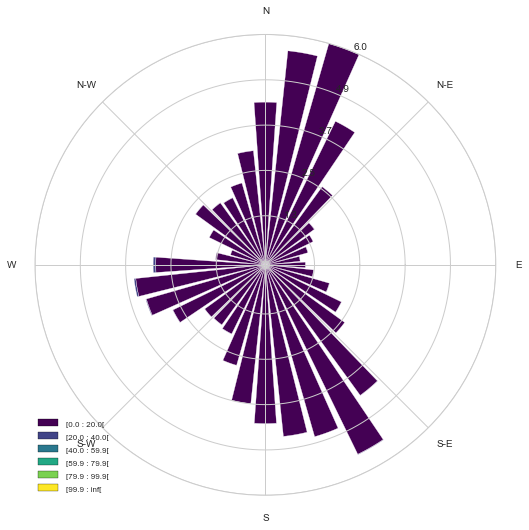

In [28]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [29]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAR8AAADZCAYAAAAZkTRQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHHxJREFUeJzt3Xt0lPW97/H3JJPJHRIiYYMglwgqIi0ENyCHNrssNShr
qVxswkXd5ax10OKJVAoWWkApUix72UqJxcuWEu3xUtNTdFlEBbFGj0kQ0IAESAIJMYTcMxMSMpfn
/DFkSEgymZnMM8/Mk+/rn8zluXyTJR9/z+33NSiKoiCEEAEWpnUBQoiBScJHCKEJCR8hhCYkfIQQ
mpDwEUJoQsJHCKEJVcNHURQ2btxIRkYGDz30EBUVFd2WaW1tJTMzk7Kysi6f19XVkZaW1u1zIYQ+
qBo+H3/8Me3t7bz55ps8+eSTbN26tcv3RUVFLF26tFso2Ww2Nm7cSFRUlJrlCSE0pGr4HD58mNmz
ZwPwgx/8gKKioi7fW61WsrOzGTduXJfPt23bRmZmJsnJyWqWJ4TQkKrhY7FYiI+Pd703Go04HA7X
+ylTpjBs2DA632Sdm5tLUlISs2bNQm6+FkK/jGpuPC4ujpaWFtd7h8NBWJj7vMvNzcVgMJCXl8fJ
kydZu3YtL774IklJSb2uc/jwYb/VLITwTmpqqk/rqRo+U6dO5eDBg6Snp3P06FEmTJjQ5zqvv/66
6/WyZct45pln3AZPB1//AFo4fPhwSNULUnMghFq90L//8asaPnfeeSd5eXlkZGQAsHXrVt5//31a
W1tZtGiRazmDwdDj+r19LoQIfaqGj8Fg4Omnn+7y2dixY7stt2fPnh7X7+1zIUTok5sMhRCakPAR
QmhCwkcIoQkJHyGEJiR8hBCakPARQmhCwkcIoQkJHyGEJiR8hBCakPARQmhCwkcIoQkJHyGEJiR8
hBCa0HX42O12Tp06hd1u17oUIcQ1dB0+JSUl3HTTQUpKSrQuRQhxDV2Hj9P1WhcghOhB0PXtstls
rFmzhiVLlvDggw9y4MABNUsUQmgk6Pp27d27l8TERN544w1efvllNm/erGaJQgiNBF3frrlz55KV
lQU4u10YjarO9CqE0Iiq/7J769vV0T5nypQpAF36c0VHR7vWzcrKYtWqVWqWKITQSND17QKoqqpi
5cqVLF26lHvuucejffXUwuPcuXOAiaKiIsxms8d1B0Io9hqTmtUXavX2R9D17aqtrWX58uVs2LCB
GTNmeLyvnvodOUddp5g0aZJH+w6UUO3PJDWrK9TqBZ317dq1axfNzc1kZ2ezc+dODAYDr7zyCiaT
yec6Om42BEhJSSE8PNznbQkh/CPo+natX7+e9evX+7WO8vJy0tOdr4uLCapRkBAD1QC6lDQWsLvu
J5IRkBDaGgB3OHfmHAHddFOZPHIhhMYG0MinQ/fDPiFE4A2wkY8QIlhI+AghNCHhI4TQhISPEEIT
Ej5CCE1I+AghNCHhI4TQxMAKn6QKGHJO6yqEEAykmwxj6uF/rgKHCV7YD8T3uYoQQj0DZ+TzH3+E
aAvE1sP/eFnraoQY8AZE+JS2lELq21AzCpqHwYzdnDefl55eQmhoAISPwkvnXoIwB3z4v+DAExBx
ma3/b6v09BJCQ/oPnyFVHG0+CiWz4Mw0OHYfXLiJT2o/gbhorasTYsAKur5dnqzjleQrV7dK7rhS
VDgU3YuCAqO+69+2hRA+C7q+XX2t47XkcufPmhuvfnb+h86fo072b9tCCJ8FXd+uvtbx2tAewqfy
NsIIk/ARQkOqhk9vfbs6TJkyhWHDhnXp29XXOl4bWk5kWCQ0jbj6mTWGcbHjYPgZ2u3tvm9bCOGz
oOvb5Wuvr55aeJSeLYXrKkk2/BsVStdtjLCP4IzxDO8ffp/Lly73uX1/C8X+TFKz+kKt3v4Iur5d
vqwDPfftqqMOiqzclHgT1562njlyJp+d+YymQU0B75UUqv2ZpGZ1hVq9oLO+XT2t46szTWcAuCH6
hm7f3RJ3CwBHao/4vH0hhO+Crm9XT+v4qiN8RseM7vbdsMhhYE7kSO0RFEXpEoBCCPXp+ibD002n
gZ5HPgaDASpu5mLrRSqa+3kvkRDCa7oOn5KmErCanKOcnpy/GYCvzn8VwKqEEKDj8LE77JSaS6Fm
FGGGXn7N6jEAnKg5EbjChBCAjsOnrLGMy/bLzifZe1M7EoATtRI+QgSabsPHNZqp6X6+x6VpKDHG
GL6rkWe8hAg03YZPRdOVk8gN/+ZmKQMpg1IorivG5rAFpC4hhJMuw8dut3O8/LjzTUuC22VTBqXQ
bm+ntKE0AJUJITroMnxKSkp4cc83zjeWPsJncAqAHHoJEWC6DB8A4qzOn5ZEt4uNi3c+UV90sZ9P
zwshvKLj8GkgwhABbbFuF4u2OGczzC/LD0RVQogrdB0+iRGJgPvHJoZFDgNbBCXNMpezEIGky/BR
FAViG6+Ej3vhhnCoHUlpUykOpR/zBgkhvKLL8Gm2NoPRRqKp7/ABoGYUrfZWypvK1S1MCOGiy/Cp
ba0F8GjkA7jugpYrXkIEji7Dp6atBoAhEUM8XMEZPvKMlxCBo8vw6Rj5JES4v8fn6grOZ7xO1sqE
8kIEiqqTiSmKwqZNmyguLsZkMrFlyxZGjbr6oOeBAwfIzs7GaDSyYMECFi1ahM1mY+3atVRWVmI0
Gtm8eXOPE5C5U9t25bDL03M+DcMxYOB0/Wmv9iOE8J1mfbtsNhu/+93v2L17Nzk5Obz11lvU19dz
6NAhHA4Hb775Jo899hjPP/+81/vtCB+PD7tsJobHDJfwESKANOvbVVJSwujRo4mLiyMiIoLU1FQK
CgoYM2YMdrsdRVEwm81ERER4vV/XyMfTE87A6PjRfG/+npb2lr4XFkL0m6qHXb314AoLC+v2XWxs
LGazmdjYWM6fP096ejqNjY3s2rXL6/36Gj5fVn9JSUMJk4dN9nqfQgjvaNa3Ky4uDovF4vqupaWF
QYMGsXv3bmbPns2qVauorq7moYce4r333sNkMrndV+cWHucbzsPlaCpKK4AxnD59Guh63sj52RjX
z0hLJAD7CvZhHW7t1+/tiVDszyQ1qy/U6u0Pzfp2paSkcO7cOZqbm4mKiqKwsJDly5dz5swZ16FW
fHw8NpvNo46lnfsdWT62gCWB8ePHA9YrP7vq+p2V6eOn85cLf8GR4FC9d1Ko9meSmtUVavVCCPft
+tWvfsXPfvYzFEVh4cKFJCcn88gjj7Bu3TqWLFmCzWbjySefJCoqyuN92h126i7XgeVmr2odEz8G
gNN1ctJZiEBwGz5//etfWbx4sc8b76tvV1paGmlpaV2+j4mJ4Q9/+IPP+6xrrXM+o9XHVBrXGhXn
nGj+TMMZn/cthPCc26td77zzjuv10qVLVS/GHy5YLjhf9DGD4bVM4SZuGHyDjHyECBC34aMoiut1
55PDwcwVPl6OfADGDxlPlaUKS3to/K5ChDK34dO5hXCotBO+Gj7ejXzsdjtDw4cCUFxT7O+yhBDX
cHvOp6WlhcLCQhwOB5cuXaKwsLDLaOj2229XvUBvVVuqnS+8HPmUl5fz1x1xkA553+WRen1oXXUQ
ItS4DZ9hw4bxxz/+EYDk5GTXa3COhPbs2aNudT7wdeQDQP1UAM6Zz/mxIiFET9yGT05OTqDq8Ju6
1jrni0uDfVh5NABnzWf9V5AQokd93udTUlLC3/72N0pLS4mMjOTGG29k0aJFDB8+PBD1ea2xrdH5
oo+J43teeSQ4wjhnkZGPEGpze8L50KFDLF68mLa2Nn784x8zc+ZM6uvrWbBgAfn5wdntoaGtAQMG
uBzj/cp2EzReT7lZplMVQm1uRz4vvPACr776KpMmTery+fz589m2bRtvvPGGqsX5orGtkbiIOMyK
jw/s14+mZsj

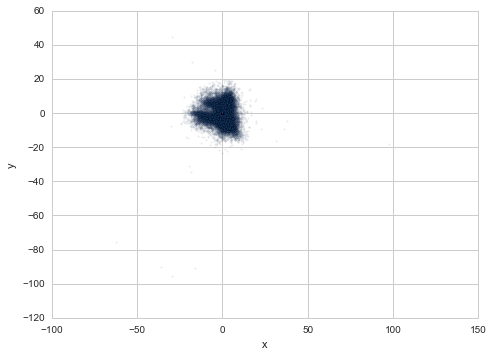

In [30]:
df.plot(kind='scatter', x='x', y='y', alpha=0.10, s=2)
plt.gca().set_aspect('equal')

## 2.2 Overview by Month

In [31]:
viridis = plt.get_cmap('viridis')

month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
        plt_configure(figsize=(3,3), title=title)
        # fig,ax = plt.subplots(figsize=(3,3))
        # sub_df['speed'].hist(bins=arange(0,sub_df.speed.max()))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANQAAADZCAYAAABYQB7GAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXd4W+XZ/z/a25K85L23MwmZJEDCKqOQAKFlJGnpoi1v
Sykt0EHp4Pf2LaO7lFFGGW0KpEBDWS2bkIQMSJzEO3a8bS1rWFvn94ciJY5nouPEtP5el69ER+c8
OpKer+593xJBEARmMIMZiALpqb6BGczgPwkzhJrBDETEDKFmMAMRMUOoGcxARMwQagYzEBEzhJrB
DETEDKFERldXF1VVVaxbt27Ec7fffjtVVVU4nc4TXv/3v/89b7zxRmK9Rx999ITXSvb6GYzEDKGm
ACqVioMHD9LT05M45vP52LVrFxKJJKm1t27dSjgcTmqNlpYWNmzYwCuvvJLUOjMYCfmpvoH/REil
Ui666CJefPFFvvKVrwDw2muvsWrVKh577LHEeRs3buTJJ59EJpORlpbGHXfcQWFhIbfffjs6nY7G
xkZ6e3spKSnhl7/8JZs2baKuro5f/OIXSKWx38Jdu3bx6quvYrPZKC8v57777kOtVvOb3/wGiUTC
//zP/4y4v6effporrriCnJyck/J5/FdBmIGo6OzsFObPny/s27dPuOiiixLHP/e5zwlNTU1CVVWV
4HA4hC1btgjnn3++4HA4BEEQhE2bNiXOv+2224Srr75aCIVCQigUEtasWSNs2rRJEARBuO6664TX
Xnstcd5VV10lBAIBIRKJCGvWrBFeeOGFSd/rbbfdJjzyyCNivfUZCIIwo/JNEWpqapBKpezfv5/e
3l6GhoYoKytDOJzp9d5773HhhRdiMpkAWLNmDf39/XR1dQGwYsUK5HI5u3btoqGhgc7OzsTaL7zw
As8//zwA55xzDkqlEqlUSkVFBXa7/SS/0xkcjRlCTSEuvfRSXnjhBV544QUuvfRSgIQNFY1GR5wf
jUYT9pFarU4cl8lkbN68edTXUCgUif9LJJIEYWdwajBDqClAfFNfeumlvPLKK7z88st8+tOfHvbc
ihUrePnllxMS5bnnnsNsNlNYWDhivYyMDNRqNU899RRyuXxUMs5gemDGKTEFiEshi8VCWVkZBoOB
lJSUYc8tW7aMDRs2sGHDBgDMZjMPPPDAmOtdcMEFPP7441x88cU8/vjjpKenj3sP4zklZjB1kAgz
OsK0xvbt29m4cSP33nsvb775Jg8++CALFiygrKyM1atXn+rbm8ExmFH5PkFYuXIlxcXFbNq06VTf
ygzGwAyhPmH43ve+N8xhMYPphRmVbwYzEBEzEmoGMxARM4SawQxExAyhZjADETETh5rBcePvf/87
mzZtQiKREAgEqK+v5/3330ev1wPw4osv8thjjyGTybj88su5+uqrT/EdnzzMOCVOMQRBIBqNEgwG
CYVCib9gMEg0GkUQhBHpRBKJBIlEgkwmQ6FQoFAoUCqVif9LpdKky0Qmi5/85CdUV1ezdu3axLHl
y5fz8ssvo1arufjii3nuuecwGAwn5X5ONWYk1ElCNBrF7/fj9Xrxer34fD6CwSCRSASIlXwc/SeX
y5HJZAliSCQSnE4nRqNxGAndbjfRaDTxl1jvMNl0Oh16nQ6dTodarU6UfYiBvXv30tzczB133DHs
eFVVFYODg8Pu/b8FM4SaAhxLHo/HQzAYRCqVolAoUKlUGI1GNBoNOp0OpVI5qXV37txJSUnJmM87
vD4uuPsRMnVqlhRlU5aWQprGi14pQyGRIBEE5EoFKXoDer0enU6HRqM54Q3/4IMPcuONN444Xl5e
zhVXXIFWq+W8885LqIL/DZghlEgIh8MMDg7icDhwuVwJ8qjVaiwWCyaTaVhm+FRgcMiPNxDkYCDI
QbtrxPMZeg2Xzy6jMt1HisqOUiJBAqSkpJCamkpKSgpy+eS2hNvtpq2tjUWLFg073tDQwFtvvcUb
b7yBVqvllltu4dVXX+WCCy4Q4y1Oe8wQKgn4/X6cTicOhwOfz4dCoUCv11NZWYlOpzvp9zPo8437
/IDHxwMf7E08vu2Ss1kzt5yBgQG6urpoa2tDo9GQmpqKyWRCpVKNudaHH37IkiVLRhw3GAxoNBqU
SiUSiYTU1FRcrpHk/k/FDKGOE8FgkIGBAex2O+FwGJVKhclkory8fNK/7lMF55D/uM4vt6Sh1+sT
Klk4HKa/vx+bzUZ3dzdyuZzU1FQyMjJGqKUHDx4kPz8/8Xjz5s34fD7Wrl3LVVddxTXXXINSqaSg
oIA1a9Yk/+Y+IZjx8k0CgiDgdrvp6+vD7XajUqnIyMggPT1dVCN/IuzcuZMFCxaM+fyLu/Zz+zOv
TmotrVLBP7/9OTJSRrdvotEoAwMDWK1WAoEAKSkpZGZmYjAY/qucDMeLGQk1DsLhMFarlf7+fgRB
wGg0MmvWrEk7EU42zCEFty5cgkwpI6qU0D3k5o2GVjqd7hHnnl1dMiaZIOZ1tFgsWCwWgsEgXV1d
tLa2Jo6npaWdcok8HTHziYwCn89Hb28vDocDpVJJdnY26enp0/6XuelAD08+tSXxOMWgZkFNLqtL
StCZ1Mh1CpwE2bRnP3PyshLn7bP34gkHqDFZMChHZrIrlUqKi4sRBAGr1UpfXx9dXV2kpqZisVjQ
aDQn5f19EjBDqKMQCATo6urC6XSi0+moqqpCq9We6tuaNAYHhzslXG4/W7e1sHVbS+KYWq1gyWlF
nJZhSRyzurw82b6Delc/VxTPYUF6PnNTc0g5hlwSiYSMjAwyMjLwer10dHRw4MABzGYzubm501Zy
n0zM5PIRU+0OHTrEvn37CIVCzJo1i8rKyk8UmQA6OmwTnuP3h9i1q42sdGPscTDEb17cgv3jEFeq
52MK6Hi2eQ+XvfYn/nhgCx/bughFIyPWif/g1NbWEgwGqauro6OjI+kmnJ90/FdLqEgkQl9fH319
fajV6k+cRDoaPl+Qzs7JtRBbtrSMtLSY/dTSb6e+xwpAfc8AAKWZqVw+Zx4av5LbP3yJPJ2RSwtm
sdRSRJp6eDhApVJRWVnJ0NAQbW1tWK1WsrKyyMzMRCaTifgOPxn4rySUIAgMDAwkXMOlpaWJJiqf
VLjdfuwO76TOrao60jH2QHf/iOdb+u20/Gs7AGdXlbCgIoc9/d3cu/ctnlx5Lbk604hrtFotNTU1
uFwuDh06RF9fHzk5OWRkZEx721NM/NcRyu/3c/DgQYLBIPn5+aSlpZ3qWxIFbrePaHRyEZDioljH
JEEQ2NnWNe65b9W38lZ9K5kpOm65ZBU5WuO456ekpDBr1iysViudnZ3YbDZKSkrGDRL/J+G/hlCC
INDX10dPTw8Gg4HKysqTGkOaarjc42dJxKFWKygszACgb9DD63VNk7qu3+UlTaObtLRJT08nNTWV
lpYW9u/fT05ODpmZmf/x0uq/glB+v5/W1lbC4fB/hHo3GlyuyWVJLF1cRlpqzA6q7+nHFxrbiRBt
2E20pw2iUSqXncn8wiOq4quvvspDDz2EVCrlkksuYf369SOul0qllJeX43K5OHjwIHa7/T9eWp2y
n+jt27dz+umn09fXlzh27733Jnp2A/T29nLxxRcnHm/evJna2tpEt9Wurq5xe9MJgkBvby8HDhxA
rVYza9as/0gyAbhck5NQ1TU5CSmxr2uk/RSHMNCNYO9DfvYaZGdeSolehUoR+/2NRqPcd999PP74
4/z1r3/l6aefHnfmVUpKCrNnz0alUrF//376+vombBk9mf0BsRlXl156KevXr2fdunWsX7+e5557
bsLPYapwSiWUUqnk9ttv55FHHhn1+aysWPDR6XRiMpl45513uOCCC3jnnXdYvXo127Zt48wzzxz1
2lAoRHNzM8F

## 2.3 Create input data, i.e. speed_set

In [32]:
SPEED_SET = array(zip(df.x, df.y))
NUMBER_OF_GAUSSIAN = 4
FIT_METHOD = 'square_error'
KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [33]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.
   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.]


In [34]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [35]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [36]:
%%time
from sklearn.grid_search import GridSearchCV

if KDE_GRIDSEARCH == True:
    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)
    
    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(zip(df_resample.x, df_resample.y))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                        {'bandwidth': bandwidth_range},
                        n_jobs=-1, cv=4) 
    
    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']

CPU times: user 280 ms, sys: 48.8 ms, total: 328 ms
Wall time: 1min 3s


In [37]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

# bandwidth = 1
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 1.9 841
[  5.20007033e-06   8.95869440e-06   1.63583900e-05   2.97872615e-05
   5.19662576e-05]


In [38]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXm4HGWZNn5XVe/dp09C2ExCwiYgGQgIOjoqoCTfqDMk
jICyKBqY0UGZz1GUxYAsAkFxlHGJgPqJgggEEERRR0DG34wMYcCgRAxrCAkkIeQsfXqr7qr6/dHn
qfPW22/t1X26cuq+rnMl53RVvdXdVXc96/1IhmEYSJAgQYIZCnm6TyBBggQJphMJCSZIkGBGIyHB
BAkSzGgkJJggQYIZjYQEEyRIMKORkGCCBAlmNBISTJAgwYxGQoIJEiSY0UhIMEGCBDMaCQkmSJBg
RiMhwQQJEsxoJCSYIEGCGY2EBBMkSDCjkZBgggQJZjQSEkyQIMGMRkKCCRIkmNFISDBBggQzGgkJ
JkiQYEYjIcEECRLMaCQkmCBBghmNhAQTJEgwo5GQYIIECWY0EhJMkCDBjEZCggkSJJjRSEgwQYIE
MxoJCSbogmEY0HUdhmFM96kkSNBzpKb7BBIMFnRdR7vdRqPRgCRJ5t8LhQIURZnGM0uQoDdISDCB
iXq9jkqlglwuB1mWYRgG6vU6NE2DruuQZRmpVMr8NyHFBLsCEhJMAMMwoGkaWq0WNE1Ds9k0SU/X
dQAwrcJ2uw3DMNBsNiHLMhRFSUgxQawhGUngZ0aD3F9d19FsNlGr1YTbSZIERVHMH1meCifTJZSQ
YoI4IiHBGYx2uw1N0wAAzWYT1WoVAKAoCvL5PDRNQ6PRECZIElJMsKsgIcEZCMMwLARYq9XQbDbN
1/P5PFKplCUmWCgUTLeZflgQKVLMMCHFBHFBEhOcYdB1Ha1WyyS0iYkJ6LoORVGQzWYd3WEiMWCq
jIYlxXa7jXa7DWCK8OhHkiSTfCmmSESaz+eRTqcTUkwwLUhIcIaAteKIhIjwstksCoWCSWBewLrD
dHyeFIlwATEpEmlKkgRVVS2WYiaTsZToJEjQKyQkOAPAJj8Mw0C1WkWr1YIkSSgWi8hkMqHXCEKK
bCRGZCmyxJlOpxNSTNATJCS4i4PcVCKYarUKXdeRSqVQKpUssTtCFGFiO1KkWCSV3gCd+kQn97nV
aqHRaCSkmKAnSEhwFwXv/jYaDdTrdQCdGFwul/NEIrSNYRihSEdEivV63VKP6OY+J6SYoBdISHAX
hKqqqFQqSKfTSKfTmJiYQLvdhizLKBaLSKfT032KZqJF13WTkHnXOSHFBP1AQoK7GDRNg6qqUFUV
hmGgVqvBMAyk02kUi0Wh+0uYTtKQJAmpVAqpVOeS5Mtx/JJirVZDu91GOp02s88JKSYQISHBXQRs
7R/F9IgwCoUCstlsrEjALymKCrfpNUmSzEQL1SimUqlYfR4JeoeEBHcBsLV/uq6bpS+SJGFoaMgk
Eq+g+N8g1dG7kSJfwE1EyCZgWOIkdzwhxQQJCcYcbOeHqqpm6xsAZDIZ3wQYF3ixFIFOeKBarQot
xYQUEwAJCcYWbA0eAFSrVaiqCqCT/aVM8EwBT4qkiUj1iLylmJBiAkJCgjEEW/vHt76VSiWz/MQv
dqWbnN4LtQPyhdsJKSYgJCQYIzi1vuVyOeTzebPUJIEVRGBUHhSWFGn7XC6HXC5nZqgTxA8JCcYE
QVrfour8iOpY/YTb+YYlRSJDRVHM+CO9RmIQCSnGAwkJxgCk+gx0Yl0TExMwDMOx9S0MDMOIHenZ
wSsR+SFFSZLM41IYQpIk27Idkg1LSHEwkZDgAKPdbkNVVfOmq9fraDQaAJxb36K42QatRKbfYEmR
Hgqi7LOqqqZFyBZus6RICSt+PktCioOBhAQHFLquo1KpoNFooFgsotlsmq1vpVKpJ6UvyU0pBpEa
S4pEfpR9ZrUUedVt2p8INCHFwUJCggMItvYPgFn7l8lkUCgUPLu/M9mS6yVYsspms11lOLzArN0o
ApYUaZuEFPuPhAQHCLzsPcWWgHi2vs0UiCxFJ9VtL6RIrnQmk0myzz1GQoIDArb2T9d1TExMmGRY
KBSQy+U8HyvszZJYkOHgRWDWjRRp+h/QCY0klmLvkJDgNMOp9i+VSplxwH5C0zRUKhXLTZYQY3AE
IUWRjiNtl7jP0SIhwWkEX/tXq9XMC7xYLJqvB0VQ4qLMJ7t/o9HoslaSmy4YvJAiffaqqqLdbncl
WgB7Ukyn08n34wMJCU4T2No/tvUtlUqhWCxCURSzHKYfVhjVHwIwSZgsUxqGJCogZq2Q5KYLBhEp
UvZZVH8o0lIEElIMioQE+ww++cHK3rOtb0Dw2J6f/XgXHIAlLkWuOGVBnQqI7Yax74qgB1MviIV9
oGSzWbMrxc8kPyAhRa9ISLCP4N1fkr2XJAmlUslW9j6oJei2H7XfsS44WYMiuBUQi4L9SbwqPKIY
bwpMkSIJzNJDjsquZup3lJBgn8Baf2zrmxfZ+16dD+uCl0olXzeB37IQuxszgX+ISNHPKAK61sgD
oeQLX7w9U5CQYI/RbrdRqVSgKAoymYyl9c2t9i/sdDcRnNRn+DnAftcLOnc4yTx3w89nEnQ+C5Ef
fdfszOeZRIoJCfYQ1DfaaDSQyWTQaDSgaZrv1reoSELk/rLqM1FaZ16sFUK9Xo8889zLmF0/EeT8
vZIivVar1YRWOkuKRJy7IikmJNgDiJSMqV80k8mgWCz25eZkyZN3fykD3S+IbkyaO2yXeR7kcpw4
Wa92pEgeichSJKKjz54SersiKSYkGDHY5AcAi8JzsVhENpv1fKwobnwn99dpn17f5BRP1HUd+Xwe
ACzWSlwyz4NGzl5AnyfQedjkcrkuS5Ee2rQN/0DalUgxIcEIYSd7D3S6P/wQIIsghEQXqpP7O0hw
0/Pz0nu7K6Gf7ryb++zFSheRIn0v6XTatvJhEJCQYATga/9YyyubzZqBZr8IcwOQNaeqqjl7JMjT
ebqUpUXlOPQZJ5nn3iJKUqRJf4VCAY888gj23HNPLF68eLremhAJCYaEm+x9Op1Gs9kMRSJ+92XX
y2azKBQKnolhEAmEMphkxXrJPE8XeccFfixNnhS9jiIgS5BIce3atTjssMNcSdAwDFx22WXYsGED
MpkMrrrqKuyzzz7m6w899BBWr16NVCqFk046CaeccortPjt37sTFF1+MSqUCTdPw5S9/2XIsICHB
UOBr/6rVqqXurt9uGuv+EorFYl/PoR+wK8eh74PNPKuqCk3TBjrJEjf4nc/Sbrfx29/+FvV63ZMa
0gMPPABVVXHbbbfhySefxKpVq7B69WrzWNdccw3uvvtuZLNZnHbaaTj++OPx+OOPC/e59tprsWzZ
Mrz3ve/Fo48+ihdeeCEhwSjg1PpmJ3sfNK7nFRSDpBs+THKDVS6JA0Sk6NbzHJYUe21hxqnEx44U
6R555pln8PnPfx4AcP/99+NnP/sZ3v3ud+MDH/iA8P09/vjjeNe73gUAWLx4MZ566inzteeffx4L
Fy5EqVQCABx99NFYu3Yt1q1bZ9ln/fr1AIAnnngCBx98MFasWIH58+dj5cqV3ecf4WcxI0CZM1L6
qFQqqNfrkGUZQ0NDwsxrr/X9ms0mxsbGoGkastksyuVyV/HzTAKb/aSSpFwuZ84KJuHSer2OarWK
RqOBVqtlhjT8rhVH9JJkiRApfPGmN70JX/rSl7Bo0SLk83n85je/wRe+8AW8+uqrwv0nJiYwNDRk
/p5KpUzrnn+tUCigUqmgWq1a/q4oCjRNw5YtWzBr1iz84Ac/wN57740bb7yxa73EEvQIvvav1Wqh
Wq16bn3rBSHFKfs7nXCLac20zHO/QNe8oih43/veh1/84hf48pe/jFwuh5GREcydO1e4X6lUMkdK
ALAIeZRKJUt

In [39]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [40]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [41]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.263   1.020  -2.321  3.095  4.214   0.024
2  0.260   1.420   4.911  2.202  3.303   0.253
3  0.250  -5.902   1.106  6.369  5.934   0.203
4  0.226   1.600  -5.328  3.712  3.266  -0.530

GMM Plot Result
0.263100825822 [[ 1.02016801 -2.32116259]] [ 3.09286331  4.21588188] 177.811012307
0.260287078959 [[ 1.42048112  4.91052762]] [ 2.08130472  3.37989303] 164.35221484
0.250420362809 [[-5.90219742  1.10597424]] [ 5.45667876  6.78306491] -54.6309635922
0.226191732411 [[ 1.60020174 -5.32794522]] [ 2.36875175  4.33977168] -128.193850516


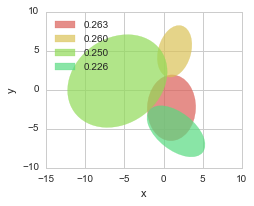

In [42]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [43]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXm8HGWZ7lPVe/dZEgMEEyAgyDoQCIjXDRdgLs4w4oAo
IAIhLsPIjEqURSJ7DOrMyCggKM4wlzVw8co44zIioI4yIEG2QCAsIRLWJGfp013dXd1V948+b/VX
X39V9dXSfbrOqef3O7/knK6qr7q76ql3fV7FNE0TCRIkSDBHoc70CSRIkCDBTCIhwQQJEsxpJCSY
IEGCOY2EBBMkSDCnkZBgggQJ5jQSEkyQIMGcRkKCCRIkmNNISDBBggRzGgkJJkiQYE4jIcEECRLM
aSQkmCBBgjmNhAQTJEgwp5GQYIIECeY0EhJMkCDBnEZCggkSJJjTSEgwQYIEcxoJCSZIkGBOIyHB
BAkSzGkkJJggQYI5jYQEEyRIMKeRkGCCBAnmNBISTJAgwZxGQoIJEiSY00hIMEGCBHMaCQkmSJBg
TiMhwQRdME0ThmHANM2ZPpUECXqO9EyfQILBgmEYaDabqNVqUBTF+nuxWEQqlZrBM0uQoDdISDCB
BU3TUC6Xkc/noaoqTNOEpmlotVowDAOqqiKdTlv/JqSYYDYgIcEEME0TrVYLuq6j1WqhXq9bpGcY
BgBYVmGz2YRpmqjX61BVFalUKiHFBLGGYiaBnzkNcn8Nw0C9Xke1WhVupygKUqmU9aOqnXAyXUIJ
KSaIIxISnMNoNptotVoAgHq9jkqlAgBIpVIoFApotVqo1WrCBElCiglmCxISnIMwTdNGgNVqFfV6
3Xq9UCggnU7bYoLFYtFym+mHBZEixQwTUkwQFyQxwTkGwzCg67pFaFNTUzAMA6lUCrlcztUdJhID
OmU0LCk2m000m00AHcKjH0VRLPKlmCIRaaFQQCaTSUgxwYwgIcE5AtaKIxIiwsvlcigWixaByYB1
h+n4PCkS4QJiUiTSVBQFjUbDZilms1lbiU6CBL1CQoJzAGzywzRNVCoV6LoORVFQKpWQzWZDrxGE
FNlIjMhSZIkzk8kkpJigJ0hIcJaD3FQimEqlAsMwkE6nMTQ0ZIvdEaIIEzuRIsUiqfQGaNcnurnP
uq6jVqslpJigJ0hIcJaCd39rtRo0TQPQjsHl83kpEqFtTNMMRToiUtQ0zVaP6OU+J6SYoBdISHAW
otFooFwuI5PJIJPJYGpqCs1mE6qqolQqIZPJzPQpWokWwzAsQuZd54QUE/QDCQnOMrRaLTQaDTQa
DZimiWq1CtM0kclkUCqVhO4vYSZJQ1EUpNNppNPtS5Ivx/FLitVqFc1mE5lMxso+J6SYQISEBGcJ
2No/iukRYRSLReRyuViRgF9SFBVu02uKoliJFqpRTKfTsfo8EvQOCQnOArC1f4ZhWKUviqJgeHjY
IhJZUPxvkOrovUiRL+AmImQTMCxxkjuekGKChARjDrbzo9FoWK1vAJDNZn0TYFwgYykC7fBApVIR
WooJKSYAEhKMLdgaPACoVCpoNBoA2tlfygTPFfCkSJqIVI/IW4oJKSYgJCQYQ7C1f3zr29DQkFV+
4hez6San90LtgHzhdkKKCQgJCcYIbq1v+XwehULBKjVJYAcRGJUHhSVF2j6fzyOfz1sZ6gTxQ0KC
MUGQ1reoOj+iOlY/4XW+YUmRyDCVSlnxR3qNxCASUowHEhKMAUj1GWjHuqampmCapmvrWxhQrR2b
IY4bCRJkicgPKSqKYh2XwhCKojiW7ZBsWEKKg4mEBAcYzWYTjUbDuuk0TUOtVgPg3voW9GYjohO5
07VazbqZ6YaezTc1S4qmaTpmnxuNhmUR8p8NkSIlrPj5LLP584sTEhIcUBiGgXK5jFqthlKphHq9
brW+DQ0NRV76QhYmAMvFJsl9IkVWL9BNWXq2gUiNJUUiP8o+u302tD8RaEKKg4WEBAcQbO0fAKv2
L5vNolgsShOOjAvLJ1iAzs0JtC0iSgDQ/+n8RDf+XLih2feWy+W6ynCcPhv+gcGSIm2TkGL/kZDg
AIGXvafYEtCb1jfDMGwJlmKxiEql4uhi8y6iX2Xp2QqRpej22ciQIrnS2Ww2yT73GAkJDgjY2j/D
MDA1NWWRYbFYRD6flz6WzM1C7i+rLUiQsSCjUJaerZD5bLxIkUIRQPthlViKvUNCgjMMt9q/dDpt
xQGjXM+pvpDts/UL0Y3vJXgQ98yzLIKQokjHkbZL3OdokZDgDIKv/atWq9YFTokJP3M/ePDkwru/
Q0NDNm3BKG8iGcEDgqZpXZbQbL6hZUiRvrtGo4Fmsym0op1IMZPJzPrPMEokJDhDYGv/2Na3dDqN
UqmEVCpllcNEYSmJ3F8ZCzOqYmkRKZKyNJs5JbA1drO9HEdEipR9FtUfOoUWElIMhoQE+ww++cHK
3rOuKRDcMmP346X1+TVmCqyydKFQAIAuS5HPnA5SOQ49FHrxObKkn8vlrK4Uv/HWhBTlkJBgH8G7
vyR7L3JNWQS1wijB4uT+OmEmYnRexclztUYRiC4JRZ8jCczSfBcqu5qrpJiQYJ/AWn9s65uM7H1Q
kBvVq/a6XsFvyclcyjwD/pNQ/OdD1wF5B5R84Yu35woSEuwxms0myuUyUqkUstmsrfXNq/YvyM1M
7i/Bz2S5sGv3CkEsobgKPxD8nHfQ+SxEfvRZsTOf5xIpJiTYQ1DfaK1WQzabRa1WQ6vV8t36JntD
sNlfoH2xU7xNBoNEfG5wI0UKNxBI9iqulmKQc5UlRXqtWq0KPx+WFIk4ZyMpJiTYA4iUjKlfNJvN
olQqRX4j6rpuG6weprQmbmBJMZvNemZXoyjHiZOF6USK5DGILEUiOvp8KKE3G0kxIcGIwSY/ANgU
nkulEnK5nPSxZG5Op8Hq4+PjPs/cfsw43eQ8KJ4IdOas+NEK9EOKcbIqCfTQANrvPZ/Pd1mK9NCm
bfjPZzaRYkKCEYJtfWNr/4B294cfAmThREhuxc9xvDl7Bd4S8hJQHQTJsF6W4PCQKWz3emiISJEe
RJlMRqoqYaaQkGAE4Gv/2La0XC5nBZr9wm0fXdc9M8xhrDmyBuOeYBDBS0B1LpfjANGSIk36KxaL
eOCBB7DTTjth6dKlM/XWhEhIMCS8ZO8zmQzq9XpoQmL/L3J/o1aXKZfLAOzze1lSnE1wq1EkQuRJ
MUyf9SDAj6Xp15LmHxhEig899BAOPPBATxI0TROXXHIJnnnmGWSzWaxevRq77rqr9fq9996La6+9
Ful0GieccAJOPPFEx302bNiAiy++GOl0GrvvvjtWr17dtd7sf6z1ECRDT0+9yclJ6LqOdDqN0dFR
ZLPZyMlpamoKmqZBUdqD1Z26P4Ksy2YMyQ2kv+m6jmq1ilqtBl3XY08CTmDrE/P5PEqlEgqFArLZ
rFVWQm4fAFSrVUvwdjZZy27gPx8q9aIWR+r0ocRLs9nEfffdB03TpNSQ7rnnHjQaDdx+++1YuXIl
1qxZY73WbDZx5ZVX4sYbb8RNN92EtWvXYvv27Y77XH311Tj77LNxyy23oF6v4/777+9aL7EEA8Ct
9c3JMgtyg7DHkHF/w4COTxgeHrYC5I1Gw1VBeTarmDiV49RqNctq1HU9csmwfsYEw8IpvED3yLPP
PouvfOUrAICf/vSn+Pd//3d88IMfxPHHHy98f+vWrcP73vc+AMDSpUvx5JNPWq89//zzWLJkiSX9
dthhh+Ghhx7Co48+attn/fr1AID99tsPY2NjlpcmKktLSNAnqJSAbgBqfVNV1XJ/eYS9kKnVCfDn
/soqS7MkDth7V+nfTCaDdDptewDMxc4NIkVy8Vi1H6fCZL7cZBDQS5IlUlRVFZqmYb/99sPll1+O
22+/Ha+//jp

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADZCAYAAADomm/dAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtwFGXW/79JT0JIMiEiCQRiLoZwkTeAAdFVl8XVrFC1
uF6CArvLskZBq/QPBYrwUwlYQHB/WFq1yO667q4SF6FEqyit3VX5yeUV3AXiS4CRa96EQAi5EAKT
DDEw078/Qnd6evo+3TPdM+dTlSLTt/MMyXxzznnO85wElmVZEARBGCAx2gMgCMK5kIAQBGEYEhCC
IAxDAkIQhGFIQAiCMAwJCEEQhnFFewAEQYQHy7JYtWoVTp48ieTkZKxduxa33XYbf/7rr7/Gpk2b
4HK58MQTT2DOnDmy93R2duLVV1+F1+uF3+/HG2+8EfQsKeMEQTiYL7/8kq2srGRZlmUPHz7MPv/8
8/y569evs2VlZazX62X7+vrYJ554gr106ZLsPZWVlew///lPlmVZ9t///je7e/duRdsUwhCEw6mt
rcWPf/xjAMCkSZNw7Ngx/lx9fT3y8/ORnp6OpKQkTJ06FQcOHAi5x+PxAAC+++47XLx4Eb/97W/x
+eef4+6771a0TQJCEA6nu7sbbrebf+1yuRAIBCTPpaamwuv1oqenJ+g4wzDw+/1obm5GZmYm/va3
v2HEiBF49913FW07NgdSW1sb7SEQhCJTpkzRdN3hw/8Pfn+m7Pnk5GSUlJTInk9PT0dPTw//OhAI
IDExkT/X3d3Nn+vp6cGQIUMk72EYBpmZmXjggQcAAD/96U/x9ttvK47dsQICANte32XZs73ebrjd
6ZY9n+zGtt2nVj6g+Vq/PxOj8tbJnm9u+j+K95eWlmLXrl2YOXMmDh8+jDFjxvDnioqKcPbsWVy9
ehUpKSk4dOgQKioqAEDynilTpmDPnj145JFHcPDgQYwePVrRtqMFhCAIoKysDPv27cPcuXMBANXV
1fj8889x7do1zJkzBytWrMDTTz8NlmVRXl6O7OxsyXsAYPny5Xj11Vfx0Ucfwe12480331S0TQJC
EA4nISEBq1evDjpWWFjIfz9jxgzMmDFD9R4AGDlyJP76179qtk1JVIIgDEMCQhCEYUhACIIwDAkI
QRCGIQEhTONMx7VoD4GIMDQLQ2hCizgUleThzNGmkOOjhw22YkiEDSABISQRC0ZRSZ6m+8TX1R9t
CnoWiUlsQQJCBCH8sGsVDSWEz+DEhEQkdiABIXCm4xr8foD5oV88zBAOKbjncmEOCYnzIQGJY4Te
Rk7RsKDVmVYiFBK/HxgbGbOEBdAsTBxypuMaLx5FJXmWeRxq8EJCszeOhTyQOEIoGnYhp2gY2hov
U27EoZAHEgeIPQ67QZ6IcyEPJIYxe0bFSopK8uJ6luZS7+loD8EQJCAxiNXC4enqCno9IVN+Ny09
xLOINGKG7LkRkRuGbkhAYgwzQxWxUHAUjQn+lfacuih5nRFhiWcRcSJRE5C6ujps2LABNTU1aGpq
QmVlJRITE1FcXIyqqqpoDcuxmCUcYtEQi4UUUtfUn7rIP0uvkHAiQtifqAjIe++9hx07diAtLQ1A
/3ZqL7/8MqZOnYqqqirs3LkTDz30UDSG5jjMClca+vrA3PzAaxENNYTP4DwUPULCrashL8TeRGUW
Jj8/H++88w7/2uPxYOrUqQCA6dOn49tvv43GsByFWbUcnq4ueLq6kJObgaIxI0wRDzHcM+VCIiVo
ZsbeRMUDKSsrQ3NzM/+aZVn++7S0NHi93mgMyxGY5XEIP8xFY0ZY/n/Oi4gOb4RCGftjiyQq18MC
6O9bkZGRoek+r7db/aIwsPr5euxe8A18n1M07OZ1+j/0DX19A8/JzQh6TiSEOzsnDS3nr+LIpUso
TE5WtZtdcAtO1ndgZKr5Y4nWz9dsWBN74x4/fhyLFy9GQUEBAGDevHmYNWuWrG1bCMgdd9yBgwcP
4q677sLevXtxzz33aLrPyr4edulXwnkcDGNOgpRhGMkwxev1hqyFOeLt0G1jonuY6jXu8W7Un7qI
Jr8feQyjuganjbkMt9vcXEi0fr5WsHPnTvT19WHr1q2oq6tDdXU1Nm3aBAC4ceMG1q9fj08//RSD
Bg3CvHnz8OCDD6K2tlbynmPHjuHpp5/GwoULNdm2hYAsX74cr732Gq5fv46ioiLMnDkz2kOKOmbW
cnh0JkeFwlFcmK3L1pGGNgDqQlI0ZgTqT11EQ18fJqo8kxKqymjtjQuA7417+PBhyd64Ho8HjY2N
2LlzJ/Lz8/HKK68gNVXe/YuagIwaNQpbt24FABQUFKCmpiZaQ7EVF3zmLasX5zmUOOP3gfH+wL/W
KxzC+043tPEipCQkRWNG4NTxZtnzhDbkeuMmJibq6o0bCAQwadIkPPnkk7jjjjvwxz/+Eb///e+x
fPlyWdu28EDiHSuW1Wv1OsLxNuTgnsMJiZKI5ORmwNPSpSmpSsVl0pjVGzcxMREPPfQQ//tXVlaG
NWvWKNqmxXRRgpuGtWJZvV7xKC7Mxqjh5ucDiguzUVyYjSPeDtV8itoUr93X8kST0tJS7NmzBwAU
e+P29fXh0KFDmDx5Mu68807JeyoqKnD06FEAwLfffosJEyYo2iYPJIIY3WdUK0aEQ4k6X7smu5NS
sxTPC8MaKW+Ey4cQxjCzN+7q1avx+uuvIykpCVlZWXj99dcVbSewwiIMB1FbW4ttr++y7PlmZen1
iobUbIgWtIiHUrgitCsUjnG5yuJw4nyoyMgJyumGthABEdqtP3VRNZSpNymZavUszFMrH8CUKVM0
XVtbW4uL2R/Inh/R9hvNz4o05IFYgNWehhCtiVI1r+M0usH4evnXasIhd92J8+2o87VLikhxYTaO
SIgI4VxIQEwk0vtvmBGy6PE2tDAuN0tRRLjxyImIp0s9oRqLydSzPvmKW1rOH+NEY+OecEMWYEA8
xuVmaa5Cretr4b+flJwjeY2SiCjlQ7TkQmK1vP1K4N5oD8EQJCBhYFfhAML3OoRCIWb8iCwcv9jO
XyMlJFpERA4tXghhD0hADBKNPUbNFA8p4RCLxvgR8iENd05JSDgbdeelw5kj3g4UYlDQMa0zMrEY
xjgREhCdRGtzYivFo66vBX6XHwwYRdGQQnh93UV5j0Tsiah5IUrEahjjRKiQTAfR8jo8XV2a9upQ
E49xuVmS4gEABRlpusVDDHe/2JNRSs6e8ftkzxH2hzwQjdg5ZAHkxUPJ6+AYPyIL3aIkahPbqGoz
L6Eg5JgwPyL2RKS8kBNnQnMtRWNGwKOhJoSIPiQgOog18ZDyOITCMWHocPnxdbby14qFhBMRIVxS
lYgtKITRwJmOaxETj4a+Ps0hC2COeDSxjWhPaeMFYcLQ4YriIb6miW0M8VjGj8iSDGWkyuON7DsC
0HaHdoAERIVIiofRfTv0iMf4EVkh4gEAhaluTcIhRiwkYpSmgwEoLuJTWmBHi+vsAQmITeA+LNw2
g2qolaYr5Tw4hB6HFDcSjwZ9KSElInJJWS2L9KzY3JkwHxIQBSLlIpvleQADsy1Bx2TCFkBaPISC
MTYjh/9SExQ5IRKKlxnl8oR9oCSqCla7ymaLR8gxjeKRlFaPG4kMgH7RkEJ4/OTVFtxIPApXoCTk
uia2kU+sSiVUpVDbeIiwJ+SBRBG94sGhtUhMq3iIvQ0tcNeJPRG9ORTAvJ3QiMhDAiLDBYvrm4yI
xxFvh2XikecaonkcHHIiIrTFjUGcg9G6WRFhb0hAFLA6fNErHkpI5Rb0eB5ihiTuD/mSQkpE1LwQ
yoPEDpQDcRB68x5itIiHUCjyUwcE9KyvKeiccPn52IwcnLyqPF1LxCa2EpDHH3+c71+Rm5uLdevW
RXlE1qC3R6w

## Goodness-of-fit Statistics

In [44]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.935  0.038      0.072  1.331683e-07      0.062       0.317

# 5. GMM by Optimization

In [45]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print FIT_METHOD

square_error


In [46]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -18.519009647902021
     jac: array([ -2.18184328e+00,   0.00000000e+00,  -2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,  -7.15255737e-07,
        -2.18183732e+00,   9.53674316e-07,  -4.76837158e-07,
        -2.38418579e-07,  -2.38418579e-07,  -4.76837158e-07,
        -2.18184733e+00,  -2.38418579e-07,   2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,   1.19209290e-06,
        -2.18183470e+00,   2.38418579e-07,   7.15255737e-07,
        -4.76837158e-07,  -7.15255737e-07,   4.76837158e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1591
     nit: 60
    njev: 60
  status: 0
 success: True
       x: array([ 0.22298396, -7.15721754,  2.0482389 ,  7.19486938,  6.74336294,
        0.60414457,  0.31287887,  1.19583793,  4.30777675,  2.97497272,
        3.46440744,  0.14901187,  0.24452404,  0.34178011, -6.13282954,
        4.96675501,  3.44655049, -0.5151959 ,  0.21961313,  1.71286799,
       -2.79618091,  3.2144781

## 5.1 GMM Result

In [47]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.313   1.196   4.308  2.975  3.464   0.149
2  0.245   0.342  -6.133  4.967  3.447  -0.515
3  0.223  -7.157   2.048  7.195  6.743   0.604
4  0.220   1.713  -2.796  3.214  2.758   0.011

GMM Plot Result
0.312878870901 [[ 1.19583793  4.30777675]] [ 2.86807601  3.55340985] 157.868568234
0.244524040328 [[ 0.34178011 -6.13282954]] [ 2.71659991  5.40068982] -117.026721778
0.222983958673 [[-7.15721754  2.0482389 ]] [ 4.37486926  8.83739827] -48.0636134996
0.219613130098 [[ 1.71286799 -2.79618091]] [ 2.75716093  3.2150488 ] -87.9007784848


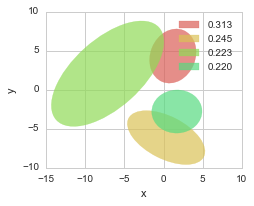

In [48]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm,ax=ax)
# fig_gmm.savefig('foo.pdf')

## 5.2 Goodness-of-fit statistics

In [49]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.996  0.012      0.021  9.063508e-09      0.016       0.083

In [50]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXm4HGWZNn5XdfV+lixshoSIQUAYBAH9XEEgXIM6hAwE
BwKyBEdlZL4ZRQWGILvB4TfKuKCgfgOCCIRVFHXEgM4owyo4RAwxEBJCwpKcpU/vtfz+6PPUefvt
t6reWrpPV07d13WunJyuqre6u+quZ70fxbIsCwkSJEgwQ6FO9wkkSJAgwXQiIcEECRLMaCQkmCBB
ghmNhAQTJEgwo5GQYIIECWY0EhJMkCDBjEZCggkSJJjRSEgwQYIEMxoJCSZIkGBGIyHBBAkSzGgk
JJggQYIZjYQEEyRIMKORkGCCBAlmNBISTJAgwYxGQoIJEiSY0UhIMEGCBDMaCQkmSJBgRiMhwQQJ
EsxoJCSYIEGCGY2EBBMkSDCjkZBgggQJZjQSEkyQIMGMRkKCCRIkmNFISDBBggQzGgkJJkiQYEYj
IcEEHbAsC6ZpwrKs6T6VBAm6Dm26TyBBf8E0Tei6jlqtBkVR7L8XCgWkUqlpPLMECbqDhAQT2KhW
qyiVSsjlclBVFZZloVqtwjAMmKYJVVWhaZr9b0KKCXYGJCSYAJZlwTAMNJtNGIaBer1uk55pmgBg
W4W6rsOyLNTrdaiqilQqlZBiglhDsZLAz4wGub+maaJer6NSqQi3UxQFqVTK/lHVqXAyXUIJKSaI
IxISnMHQdR2GYQAA6vU6yuUyACCVSiGfz8MwDNRqNWGCJCHFBDsLEhKcgbAsq40AK5UK6vW6/Xo+
n4emaW0xwUKhYLvN9MOCSJFihgkpJogLkpjgDINpmmg2mzahTUxMwDRNpFIpZLNZV3eYSAyYKqNh
SVHXdei6DmCK8OhHURSbfCmmSESaz+eRTqcTUkwwLUhIcIaAteKIhIjwstksCoWCTWAyYN1hOj5P
ikS4gJgUiTQVRUGj0WizFDOZTFuJToIE3UJCgjMAbPLDsiyUy2U0m00oioJisYhMJhN6jSCkyEZi
RJYiS5zpdDohxQRdQUKCOznITSWCKZfLME0TmqZhYGCgLXZHiCJM7ESKFIuk0hugVZ/o5j43m03U
arWEFBN0BQkJ7qTg3d9arYZqtQqgFYPL5XJSJELbWJYVinREpFitVtvqEb3c54QUE3QDCQnuhGg0
GiiVSkin00in05iYmICu61BVFcViEel0erpP0U60mKZpEzLvOiekmKAXSEhwJ4NhGGg0Gmg0GrAs
C5VKBZZlIZ1Oo1gsCt1fwnSShqIo0DQNmta6JPlyHL+kWKlUoOs60um0nX1OSDGBCAkJ7iRga/8o
pkeEUSgUkM1mY0UCfklRVLhNrymKYidaqEZR07RYfR4JuoeEBHcCsLV/pmnapS+KomBwcNAmEllQ
/K+f6ui9SJEv4CYiZBMwLHGSO56QYoKEBGMOtvOj0WjYrW8AkMlkfBNgXCBjKQKt8EC5XBZaigkp
JgASEowt2Bo8ACiXy2g0GgBa2V/KBM8U8KRImohUj8hbigkpJiAkJBhDsLV/fOvbwMCAXX7iFzvT
TU7vhdoB+cLthBQTEBISjBHcWt9yuRzy+bxdapKgHURgVB4UlhRp+1wuh1wuZ2eoE8QPCQnGBEFa
36Lq/IjqWL2E1/mGJUUiw1QqZccf6TUSg0hIMR5ISDAGINVnoBXrmpiYgGVZrq1vYWBZVuxIzwmy
ROSHFBVFsY9LYQhFURzLdkg2LCHF/kRCgn0MXdfRaDTsm65araJWqwFwb32L4mbrtxKZXoMlRXoo
iLLPjUbDtgjZwm2WFClhxc9nSUixP5CQYJ/CNE2USiXUajUUi0XU63W79W1gYKArpS/JTSkGkRpL
ikR+lH1mtRR51W3anwg0IcX+QkKCfQi29g+AXfuXyWRQKBSk3d+ZbMl1EyxZZbPZjjIcXmDWaRQB
S4q0TUKKvUdCgn0EXvaeYktAPFvfZgpElqKb6rYMKZIrnclkkuxzl5GQYJ+Arf0zTRMTExM2GRYK
BeRyOeljhb1ZEgsyHGQEZr1Ikab/Aa3QSGIpdg8JCU4z3Gr/NE2z44C9hGEYKJVKbTdZQozBEYQU
RTqOtF3iPkeLhASnEXztX6VSsS/wYrFovx4UQYmLMp/s/rVarcNaSW66YJAhRfrsG40GdF3vSLQA
zqSYTqeT78cHEhKcJrC1f2zrm6ZpKBaLSKVSdjlML6wwqj8EYJMwWaY0DElUQMxaIclNFwwiUqTs
s6j+UKSlCCSkGBQJCfYYfPKDlb1nW9+A4LE9P/vxLjiAtrgUueKUBXUrIHYaxr4zgh5M3SAW9oGS
zWbtrhQ/k/yAhBRlkZBgD8G7vyR7rygKBgYGHGXvg1qCXvtR+x3rgpM1KIJXAbEo2J/Eq8IjivGm
wBQpksAsPeSo7GqmfkcJCfYIrPXHtr7JyN5363xYF3xgYMDXTeC3LMTpxkzgHyJS9DOKgK418kAo
+cIXb88UJCTYZei6jlKphFQqhUwm09b65lX7F3a6mwhu6jP8HGC/6wWdO5xknjvh5zMJOp+FyI++
a3bm80wixYQEuwjqG63VashkMqjVajAMw3frW1QkIXJ/WfWZKK0zGWuFUK1WI888dzNm10sEOX9Z
UqTXKpWK0EpnSZGIc2ckxYQEuwCRkjH1i2YyGRSLxZ7cnCx58u4vZaB7BdGNSXOHnTLP/VyOEyfr
1YkUySMRWYpEdPTZU0JvZyTFhAQjBpv8ANCm8FwsFpHNZqWPFcWN7+b+uu3T7Zuc4ommaSKfzwNA
m7USl8xzv5GzDOjzBFoPm1wu12Ep0kObtuEfSDsTKSYkGCGcZO+BVveHHwJkEYSQ6EJ1c3/7CV56
fjK9tzsTeunOe7nPMla6iBTpe0mn046VD/2AhAQjAF/7x1pe2WzWDjT7RZgbgKy5RqNhzx4J8nSe
LmVpUTkOfcZJ5rm7iJIUadJfoVDAo48+it122w0HH3zwdL01IRISDAkv2ft0Oo16vR6KRPzuy66X
zWZRKBSkiaEfCYQymGTFymSep4u84wI/liZPirKjCMgSJFJ8/PHHcdBBB3mSoGVZuOyyy7Bu3Tpk
MhlcffXVWLBggf36mjVrcP3110PTNJx00kk4+eSTHffZsWMHVq5ciVKpBMMw8NWvfrXtWEBCgqHA
1/6Vy+W2urteu2ms+0soFos9PYdewKkch74PNvPcaDRgGEZfJ1niBr/zWXRdx8MPP4xqtSqlhvTQ
Qw+h0Wjg9ttvx7PPPotVq1bh+uuvt491zTXX4J577kE2m8Wpp56KY445Bk899ZRwn2uvvRZLlizB
cccdh8ceewwvvvhiQoJRwK31zUn2PmhcTxYUg6QbPkxyg1UuiQNEpOjV8xyWFLttYcapxMeJFOke
eeGFF/DFL34RAPDggw/iJz/5CY466iiceOKJwvf31FNP4UMf+hAA4OCDD8Zzzz1nv7ZhwwYsXLgQ
AwMDAIDDDz8cjz/+OJ555pm2fdauXQsAePrpp7Hffvvh7LPPxvz583HxxRd3nn+En8WMAGXOSOmj
VCqhWq1CVVUMDg4KM6/d1ver1+sYGxuDYRjIZrMYGhrqKH6eSWCzn1SSlMvl7FnBJFxarVZRLpdR
q9XQbDbtkIbfteKIbpIsESKFL97xjnfgyiuvxIEHHoh8Po9f/epX+Jd/+Rds3bpVuP/ExAQGBwft
/2uaZlv3/GuFQgGlUgnlcrnt76lUCoZhYMuWLZg1axb+4z/+A3vssQduvPHGjvUSS1ASfO1fs9lE
uVyWbn3rBiHFKfs7nfCKac20zHOvQNd8KpXCRz7yEfzsZz/DV7/6VeRyOYyMjGDevHnC/QYGBuyR
EgDahDwGBgb

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADZCAYAAADomm/dAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtwFGXW/79JT0JIMiEiCQRiLoZwkTeAAdFVl8XVrFC1
uF6CArvLskZBq/QPBYrwUwlYQHB/WFq1yO667q4SF6FEqyit3VX5yeUV3AXiS4CRa96EQAi5EAKT
DDEw078/Qnd6evo+3TPdM+dTlSLTt/MMyXxzznnO85wElmVZEARBGCAx2gMgCMK5kIAQBGEYEhCC
IAxDAkIQhGFIQAiCMAwJCEEQhnFFewAEQYQHy7JYtWoVTp48ieTkZKxduxa33XYbf/7rr7/Gpk2b
4HK58MQTT2DOnDmy93R2duLVV1+F1+uF3+/HG2+8EfQsKeMEQTiYL7/8kq2srGRZlmUPHz7MPv/8
8/y569evs2VlZazX62X7+vrYJ554gr106ZLsPZWVlew///lPlmVZ9t///je7e/duRdsUwhCEw6mt
rcWPf/xjAMCkSZNw7Ngx/lx9fT3y8/ORnp6OpKQkTJ06FQcOHAi5x+PxAAC+++47XLx4Eb/97W/x
+eef4+6771a0TQJCEA6nu7sbbrebf+1yuRAIBCTPpaamwuv1oqenJ+g4wzDw+/1obm5GZmYm/va3
v2HEiBF49913FW07NgdSW1sb7SEQhCJTpkzRdN3hw/8Pfn+m7Pnk5GSUlJTInk9PT0dPTw//OhAI
IDExkT/X3d3Nn+vp6cGQIUMk72EYBpmZmXjggQcAAD/96U/x9ttvK47dsQICANte32XZs73ebrjd
6ZY9n+zGtt2nVj6g+Vq/PxOj8tbJnm9u+j+K95eWlmLXrl2YOXMmDh8+jDFjxvDnioqKcPbsWVy9
ehUpKSk4dOgQKioqAEDynilTpmDPnj145JFHcPDgQYwePVrRtqMFhCAIoKysDPv27cPcuXMBANXV
1fj8889x7do1zJkzBytWrMDTTz8NlmVRXl6O7OxsyXsAYPny5Xj11Vfx0Ucfwe12480331S0TQJC
EA4nISEBq1evDjpWWFjIfz9jxgzMmDFD9R4AGDlyJP76179qtk1JVIIgDEMCQhCEYUhACIIwDAkI
QRCGIQEhTONMx7VoD4GIMDQLQ2hCizgUleThzNGmkOOjhw22YkiEDSABISQRC0ZRSZ6m+8TX1R9t
CnoWiUlsQQJCBCH8sGsVDSWEz+DEhEQkdiABIXCm4xr8foD5oV88zBAOKbjncmEOCYnzIQGJY4Te
Rk7RsKDVmVYiFBK/HxgbGbOEBdAsTBxypuMaLx5FJXmWeRxq8EJCszeOhTyQOEIoGnYhp2gY2hov
U27EoZAHEgeIPQ67QZ6IcyEPJIYxe0bFSopK8uJ6luZS7+loD8EQJCAxiNXC4enqCno9IVN+Ny09
xLOINGKG7LkRkRuGbkhAYgwzQxWxUHAUjQn+lfacuih5nRFhiWcRcSJRE5C6ujps2LABNTU1aGpq
QmVlJRITE1FcXIyqqqpoDcuxmCUcYtEQi4UUUtfUn7rIP0uvkHAiQtifqAjIe++9hx07diAtLQ1A
/3ZqL7/8MqZOnYqqqirs3LkTDz30UDSG5jjMClca+vrA3PzAaxENNYTP4DwUPULCrashL8TeRGUW
Jj8/H++88w7/2uPxYOrUqQCA6dOn49tvv43GsByFWbUcnq4ueLq6kJObgaIxI0wRDzHcM+VCIiVo
ZsbeRMUDKSsrQ3NzM/+aZVn++7S0NHi93mgMyxGY5XEIP8xFY0ZY/n/Oi4gOb4RCGftjiyQq18MC
6O9bkZGRoek+r7db/aIwsPr5euxe8A18n1M07OZ1+j/0DX19A8/JzQh6TiSEOzsnDS3nr+LIpUso
TE5WtZtdcAtO1ndgZKr5Y4nWz9dsWBN74x4/fhyLFy9GQUEBAGDevHmYNWuWrG1bCMgdd9yBgwcP
4q677sLevXtxzz33aLrPyr4edulXwnkcDGNOgpRhGMkwxev1hqyFOeLt0G1jonuY6jXu8W7Un7qI
Jr8feQyjuganjbkMt9vcXEi0fr5WsHPnTvT19WHr1q2oq6tDdXU1Nm3aBAC4ceMG1q9fj08//RSD
Bg3CvHnz8OCDD6K2tlbynmPHjuHpp5/GwoULNdm2hYAsX74cr732Gq5fv46ioiLMnDkz2kOKOmbW
cnh0JkeFwlFcmK3L1pGGNgDqQlI0ZgTqT11EQ18fJqo8kxKqymjtjQuA7417+PBhyd64Ho8HjY2N
2LlzJ/Lz8/HKK68gNVXe/YuagIwaNQpbt24FABQUFKCmpiZaQ7EVF3zmLasX5zmUOOP3gfH+wL/W
KxzC+043tPEipCQkRWNG4NTxZtnzhDbkeuMmJibq6o0bCAQwadIkPPnkk7jjjjvwxz/+Eb///e+x
fPlyWdu28EDiHSuW1Wv1OsLxNuTgnsMJiZKI5ORmwNPSpSmpSsVl0pjVGzcxMREPPfQQ//tXVlaG
NWvWKNqmxXRRgpuGtWJZvV7xKC7Mxqjh5ucDiguzUVyYjSPeDtV8itoUr93X8kST0tJS7NmzBwAU
e+P29fXh0KFDmDx5Mu68807JeyoqKnD06FEAwLfffosJEyYo2iYPJIIY3WdUK0aEQ4k6X7smu5NS
sxTPC8MaKW+Ey4cQxjCzN+7q1avx+uuvIykpCVlZWXj99dcVbSewwiIMB1FbW4ttr++y7PlmZen1
iobUbIgWtIiHUrgitCsUjnG5yuJw4nyoyMgJyumGthABEdqtP3VRNZSpNymZavUszFMrH8CUKVM0
XVtbW4uL2R/Inh/R9hvNz4o05IFYgNWehhCtiVI1r+M0usH4evnXasIhd92J8+2o87VLikhxYTaO
SIgI4VxIQEwk0vtvmBGy6PE2tDAuN0tRRLjxyImIp0s9oRqLydSzPvmKW1rOH+NEY+OecEMWYEA8
xuVmaa5Cretr4b+flJwjeY2SiCjlQ7TkQmK1vP1K4N5oD8EQJCBhYFfhAML3OoRCIWb8iCwcv9jO
XyMlJFpERA4tXghhD0hADBKNPUbNFA8p4RCLxvgR8iENd05JSDgbdeelw5kj3g4UYlDQMa0zMrEY
xjgREhCdRGtzYivFo66vBX6XHwwYRdGQQnh93UV5j0Tsiah5IUrEahjjRKiQTAfR8jo8XV2a9upQ
E49xuVmS4gEABRlpusVDDHe/2JNRSs6e8ftkzxH2hzwQjdg5ZAHkxUPJ6+AYPyIL3aIkahPbqGoz
L6Eg5JgwPyL2RKS8kBNnQnMtRWNGwKOhJoSIPiQgOog18ZDyOITCMWHocPnxdbby14qFhBMRIVxS
lYgtKITRwJmOaxETj4a+Ps0hC2COeDSxjWhPaeMFYcLQ4YriIb6miW0M8VjGj8iSDGWkyuON7DsC
0HaHdoAERIVIiofRfTv0iMf4EVkh4gEAhaluTcIhRiwkYpSmgwEoLuJTWmBHi+vsAQmITeA+LNw2
g2qolaYr5Tw4hB6HFDcSjwZ9KSElInJJWS2L9KzY3JkwHxIQBSLlIpvleQADsy1Bx2TCFkBaPISC
MTYjh/9SExQ5IRKKlxnl8oR9oCSqCla7ymaLR8gxjeKRlFaPG4kMgH7RkEJ4/OTVFtxIPApXoCTk
uia2kU+sSiVUpVDbeIiwJ+SBRBG94sGhtUhMq3iIvQ0tcNeJPRG9ORTAvJ3QiMhDAiLDBYvrm4yI
xxFvh2XikecaonkcHHIiIrTFjUGcg9G6WRFhb0hAFLA6fNErHkpI5Rb0eB5ihiTuD/mSQkpE1LwQ
yoPEDpQDcRB68x5itIiHUCjyUwcE9KyvKeiccPn52IwcnLyqPF1LxCa2EpDHH3+c71+Rm5uLdevW
RXlE1qC3R6w

In [51]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

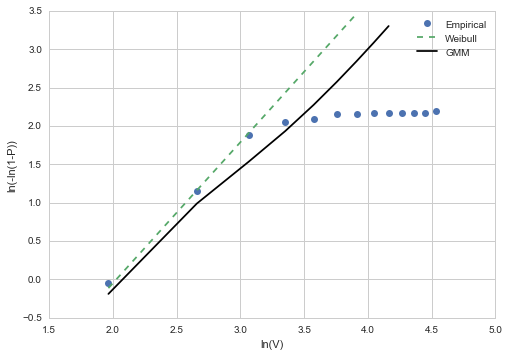

In [52]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


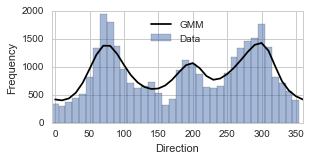

In [53]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(zip(*y_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print title

Speed Distribution Comparison


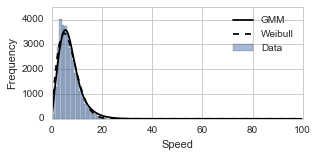

In [54]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(zip(*y_)[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', color='black', label='Weibull')   
title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print title

In [55]:
%%time
incre = SECTOR_LENGTH 
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# #This R square is compute as in paper 
# # Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# # http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print true_R_square(density_collection)

0.859691874142
CPU times: user 512 ms, sys: 110 ms, total: 622 ms
Wall time: 10.6 s


## 5.3 Sectoral Comaprison

In [56]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.3))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(zip(*y_)[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)      
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        plt.gca().set_xlim(right = log(max_speed+1))
        
        print '%s (%s - %s) degree' % (angle, start_angle, end_angle)     

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(zip(*density_expected_ )[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.exponweib.cdf(bins[1:], *weibull_params) - sp.stats.exponweib.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print 'data size:', len(sub_df), 'weight', len(sub_df)/len(df)
        print 'GMM', 'Weibull'
        print 'R square', R_square_gmm,  R_square_weibull
        print 'max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()]
        print ' '
    return max_diff_array, curve_collection

5.0 (-5.0 - 15.0) degree


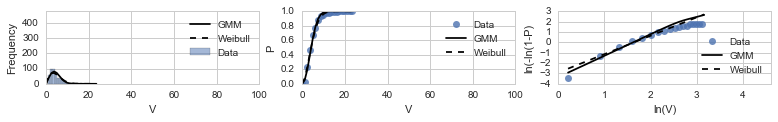

data size: 463 weight 0.0143878185208
GMM Weibull
R square 0.902143345685 0.892176808497
max diff: 0.0629478695792 0.0618321173907 speed value: 3.71826259895 y gmm 0.407894463034
 
25.0 (15.0 - 35.0) degree


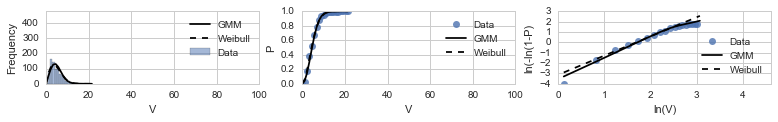

data size: 825 weight 0.0256370416408
GMM Weibull
R square 0.886755849441 0.909957112337
max diff: 0.0889177790843 0.0467805464588 speed value: 3.38860023264 y gmm 0.300173130007
 
45.0 (35.0 - 55.0) degree


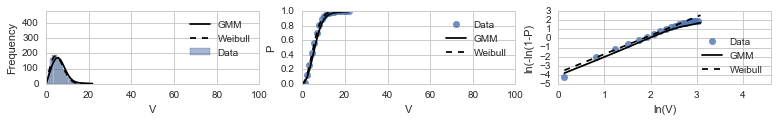

data size: 1330 weight 0.0413300186451
GMM Weibull
R square 0.919302153554 0.983561949448
max diff: 0.0982802330817 0.016861452565 speed value: 4.57666015234 y gmm 0.325028037595
 
65.0 (55.0 - 75.0) degree


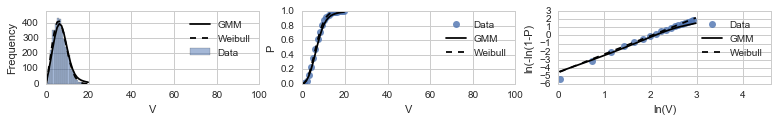

data size: 3294 weight 0.102361715351
GMM Weibull
R square 0.955477881511 0.989883824905
max diff: 0.0724898472771 0.0146844761088 speed value: 7.24977940053 y gmm 0.542567833354
 
85.0 (75.0 - 95.0) degree


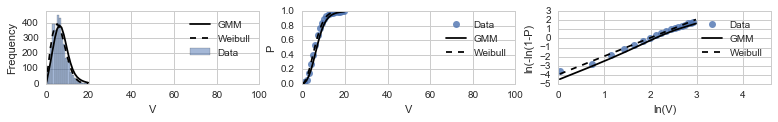

data size: 3187 weight 0.0990366687383
GMM Weibull
R square 0.88746111594 0.952125929382
max diff: 0.124425942799 0.0226947974462 speed value: 7.26418732441 y gmm 0.544227963696
 
105.0 (95.0 - 115.0) degree


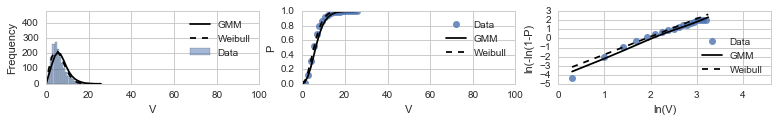

data size: 1691 weight 0.0525481665631
GMM Weibull
R square 0.850931838018 0.937853987762
max diff: 0.142141719612 0.044986704675 speed value: 6.76785430406 y gmm 0.545617003038
 
125.0 (115.0 - 135.0) degree


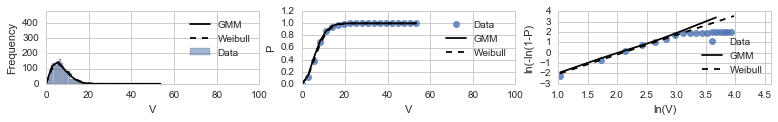

data size: 1283 weight 0.0398694841516
GMM Weibull
R square 0.959690988584 0.96145012721
max diff: 0.0593954282496 0.027015756869 speed value: 5.63151417672 y gmm 0.444430502295
 
145.0 (135.0 - 155.0) degree


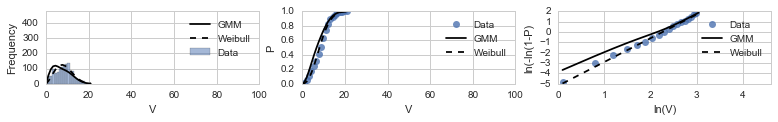

data size: 1259 weight 0.0391236793039
GMM Weibull
R square 0.613092248461 0.857686379157
max diff: 0.168025670046 0.0465434667961 speed value: 6.59660927065 y gmm 0.484149577909
 
165.0 (155.0 - 175.0) degree


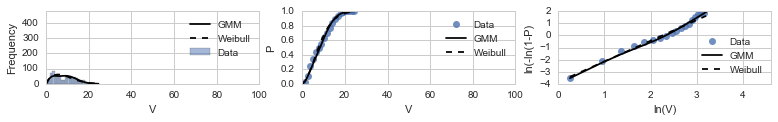

data size: 741 weight 0.0230267246737
GMM Weibull
R square 0.736225678001 0.67174739507
max diff: 0.0702050876974 0.056046122317 speed value: 5.16375932644 y gmm 0.277973049954
 
185.0 (175.0 - 195.0) degree


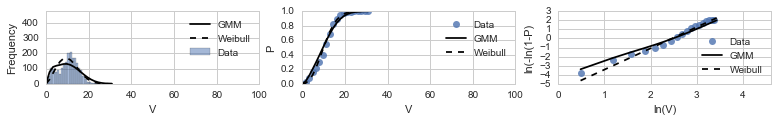

data size: 2066 weight 0.0642013673089
GMM Weibull
R square 0.763476992001 0.795204780923
max diff: 0.0977607666075 0.0752821862466 speed value: 8.12332133219 y gmm 0.39446938229
 
205.0 (195.0 - 215.0) degree


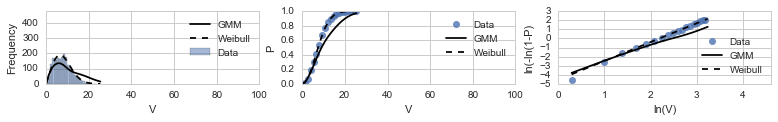

data size: 1926 weight 0.0598508390305
GMM Weibull
R square 0.750256493205 0.966878601645
max diff: 0.203265742469 0.0164030941502 speed value: 12.040440367 y gmm 0.644086282454
 
225.0 (215.0 - 235.0) degree


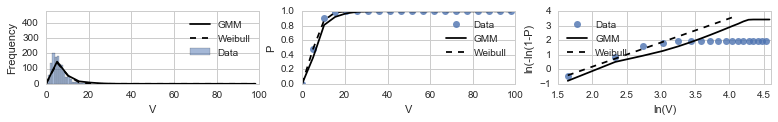

data size: 1263 weight 0.0392479801119
GMM Weibull
R square 0.915239645983 0.919425790862
max diff: 0.111547237067 0.0320294573406 speed value: 5.15984286295 y gmm 0.363512145356
 
245.0 (235.0 - 255.0) degree


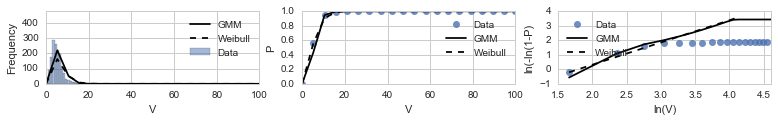

data size: 1538 weight 0.0477936606588
GMM Weibull
R square 0.892227242058 0.850057565464
max diff: 0.135810854139 0.0453519817738 speed value: 5.2586518177 y gmm 0.433109822064
 
265.0 (255.0 - 275.0) degree


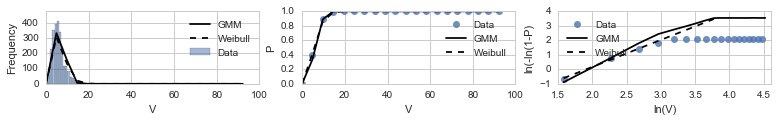

data size: 2522 weight 0.0783716594158
GMM Weibull
R square 0.929478382626 0.918927083594
max diff: 0.055814836432 0.0298083566869 speed value: 4.84813432829 y gmm 0.335541230182
 
285.0 (275.0 - 295.0) degree


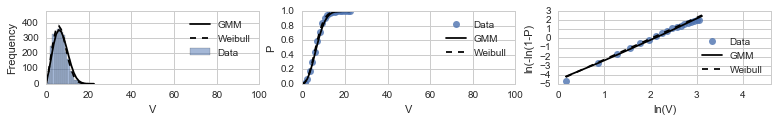

data size: 2968 weight 0.0922311995028
GMM Weibull
R square 0.957960718661 0.983415497681
max diff: 0.0624582657523 0.012820236025 speed value: 9.45581878614 y gmm 0.777838230205
 
305.0 (295.0 - 315.0) degree


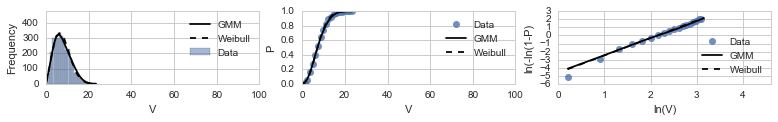

data size: 3139 weight 0.0975450590429
GMM Weibull
R square 0.969645289455 0.974035494648
max diff: 0.0253113737231 0.017506932651 speed value: 11.0859532184 y gmm 0.803296463168
 
325.0 (315.0 - 335.0) degree


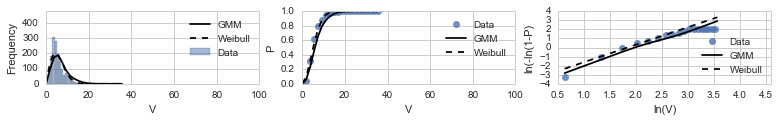

data size: 1540 weight 0.0478558110628
GMM Weibull
R square 0.82324258982 0.880926336104
max diff: 0.159337188657 0.0600660938304 speed value: 5.61100510362 y gmm 0.453000473681
 
345.0 (335.0 - 355.0) degree


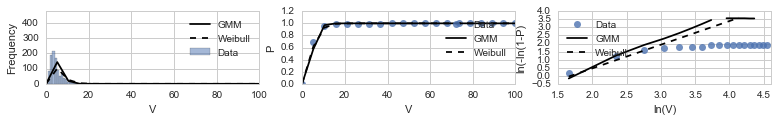

data size: 975 weight 0.0302983219391
GMM Weibull
R square 0.871856659279 0.819088292193
max diff: 0.124753515583 0.0807518338609 speed value: 5.23533218402 y gmm 0.570631099801
 
CPU times: user 1min 11s, sys: 383 ms, total: 1min 12s
Wall time: 1min 12s


In [57]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.882059640836 0.924300126286


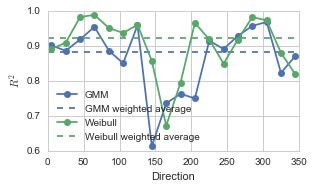

In [58]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$")
print gmm_mean, weibull_mean

0.0988599302509 0.0330507716575


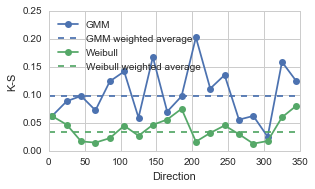

In [59]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S")
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim)
print gmm_mean, weibull_mean

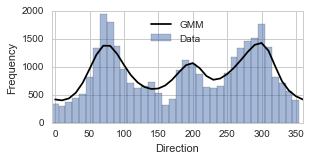

In [60]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [61]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [62]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

205.0 (195.0 - 215.0) Degree Speed Distribution
0.204130398675 12.5 0.662951636631


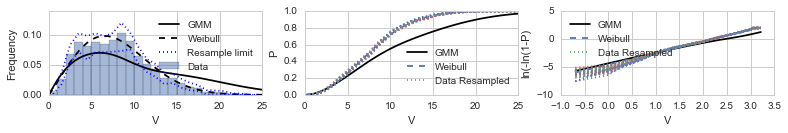

In [63]:
fig = plt.figure(figsize=(13,1.5))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02  
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 3. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)

diff = abs(y_ecdf - y_gmm_cdf)
print diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()]

### 5.3.2 Time Variability

In [64]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))
 
x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]

ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
ax1.set_zlim(bottom = 0)
align_figures()

205.0 (195.0 - 215.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAFBCAYAAAD69Z+AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXmYXFWZ/z93q7W701kISzayAnEgEMAgEA0CTsBlHCAP
i6IOMDOKgw46jgMqoA4THByXcYiijjowYITfACKyKISMiAwkgQTCEiAJCQkhZO2luqru+vuj+ty+
VV1VXdV1q7uq63yex0c6VXXrVNW953vf97zv9yie53lIJBKJRCIpizraA5BIJBKJpBmQgimRSCQS
SQVIwZRIJBKJpAKkYEokEolEUgFSMCUSiUQiqQApmBKJRCKRVIAUTIlEIpFIKkAKpkQikUgkFSAF
UyKRSCSSCpCCKZFIJBJJBUjBlEgkEomkAqRgSiQSiURSAVIwJRKJRCKpACmYEolEIpFUgBRMiUQi
kUgqQAqmRCKRSEaMN998k8997nNcdNFFfPKTn+TTn/40r7/+Oj/4wQ+YP38+e/bs8Z+7f/9+/uzP
/oz77ruPnTt3cvTRR/OTn/wk73if/vSn+cQnPjEiY5eCKZFIJJIRIZPJcOWVV3LFFVewcuVK/uu/
/ovPfvazfOMb30BRFGbOnMlDDz3kP/+3v/0tRxxxhP/39OnT+d3vfuf/ffDgQbZv3z5i49dH7J0k
EolE0jB86Utf4u677w71mMuWLePmm28u+fiqVas45ZRTOO644/x/O/bYY7ntttv4j//4D8455xwe
eughP2JcvXo1Z5xxhv/c8ePHM378eLZs2cKsWbN46KGHOOecc1izZk2on6MUMsKUSCQSyYiwY8cO
ZsyY4f995ZVXcumll7J06VJ2797NpEmTSCQS7Nixg+3bt3P44YcTjUbzjvHBD36Q3/72twA89thj
nHXWWSM2fhlhSiQSSQty8803l40G68Hhhx/Oxo0b/b9XrFgBwIUXXoht2yiK4guiZVl8+MMf5o9/
/KP/fEVROOuss7jkkks477zzOOSQQwYJaj2REaZEIpFIRoQzzzyTp556iueff97/t23btvH222+j
KAoAH/jAB3jsscd49tlnWbRo0aBjxONxZs6cyc0338yHP/xhADzPG5HxywhTIpFIJCNCIpHgRz/6
Ed/+9rfZs2cPtm2j6zrXXnstr732GgBtbW0cdthheanbQj784Q9z/fXX893vfpetW7f6YltvFG+k
pFkikUgkkiZGpmQlEolEIqkAKZgSiUQikVSAFExJy+J5HrZtj1jBgEQiaW5k0Y+k5fA8D8dxsCyL
bDaLpmmoqorrunieRywWwzCMESskkEgkzYEUTEnL4Hke6XSa3t5eYrEYkUgEVc0lWVzXJZ1O4zgO
nueRyWRQFAVVVf3/aZqGpmlSSCWSFkUKpmTMIyJK27axbdv/b9M0sW3bjzCDqVkhiq7r+pGn+Hch
pOL/dV33/5ZIJGMXuYYpGbOINcpsNuu7iLiuC0A2m8WyLP85pmn6j/X19dHX10cmk/FFNSimQQHO
ZrOkUil6enro7e2lr6+PdDqNaZp+tCqRSHJ86lOf4oUXXgDAsixOOukkfvazn/mPX3rppbzyyiuD
XvfEE09w9913s3PnTi688MKK3+/000/3j7t169YaRy8jTMkYJChokIsKbdsmnU5jWRYAqqqSSCR8
kXRd1xdNIazisSAiGg3+T0SW4n0BX4wLnyfSuiIVLJG0Eqeddhrr1q3j2GOPZe3atSxevJj//d//
5bLLLsM0TXbt2sXRRx896HWLFy8GYOfOnaOayZFXrWTMUCyidByHnp4euru7sSwLTdMAiEajGIbh
i5lIq0LOeiuZTJJIJPznibXLYLFQOp0mlUqRSqVIp9N+1CpEM7g+ats2lmX5a6g9PT3+6zKZjKzW
lYwKRx5Z/H9hPb+QU089lbVr1wLwhz/8gWXLlvnZmeeee46TTz6ZNWvWcMkll3DppZfyla98Bdu2
uffee/m3f/s3APbt28eVV17JhRdeyA9/+EMArrnmGt9z9oknnuCaa66pfFBVICNMSdMjIjuRAi0W
Ueq6Tjwex/M8ent7hzxmcK2y8L1E9Bn8n3j/wmMURqTiuEBeFGuaZt5rxHvLQiPJWGL+/Pls2bIF
gDVr1vCFL3yB97znPfzpT39i06ZNnH766Xz1q1/ll7/8JRMmTOD73/8+9957L7qu+9dAOp3m5ptv
Jh6P87GPfSxv+696IwVT0rQUE0rHcYoKpbjgxL8Pl2BatXAsQjiDQirSwkEKU7qFQiqEt7DQSDxm
GAbRaFQWGklq5o036vv8QhRF4eijj+YPf/gDhxxyCIZhsHjxYlavXs2mTZv42Mc+xte+9jX+/u//
Hs/zME2TU089lenTp/vHOOqoo0gmk0BuL803CgZVz0yNFExJ0zEcoSx2jDApJqSe55WMSIezPmrb
NplMhkgkgmVZeVFosGI3KLASSaPxnve8h1tvvZUPfehDAJx44onccsstqKrK+PHjOfzww1mxYgVt
bW2sWrWKZDLJW2+95b9+8+bNpNNpDMPg+eef58ILL+Spp55iz549ALz00kt1G7sUTEnTEIZQliMo
TmFQLq0rPkslaV0hnsHXi7+FkAbHHXyNoijoui7TupKG4bTTTuO6667z9+I0DINx48ZxzDHHoCgK
1157LX/zN3+D67q0t7fzrW99K08wOzs7ufrqq9m/fz/nnnsus2fPZtmyZVx77bX85je/4cgii6ph
nftytxJJw1PJGqWmaSQSiSGF0rZturu7icViJBIJf+0QBlpN4vH4oJTrSFAqGi12iQ61Plp4XPEa
acQgkQwfGWFKGhZRoGOapi9ihRGlpmnE4/ExYWU31PqoZVl+9W8wsgwy1PqoNGKQSIaPFExJwxGM
KE3TxDRNIpGIbwgAtQtlMyVWhJAKkTQMA8MwqlofFRHlUP2jnueRzWb91xRGpFJIJa2MFExJw1As
9SqETbSCjKWIshaqXR8tJqSFKdpSQhp0LCpcH9U0bVjrxRJJMyIFUzLqFBNKYYZe6MxTq1CO9Yl9
NPtHxfM8z0PXdSKRyJj/viWthRRMyahRTiiDE7HneSQSCSKRSKjvHTx+scfGEiPRPyqOI0r+xW4w
wfVRWWgkaWakYEpGnEqEUqRehQ3dSEywrTiJh9E/GlzfLNzxpXB9NPiaYv66rfgbSJoHKZiSEaMa
oRSp18J0Ya3ICXlowlgftSwL13WrMqoPpoKlUb2kEZGCKak7wxHKYseQjC6VrI+K/UaBqtZHg0b1
pdZHpRGDZLSRgimpG2EIZb0mRSnA4RGMBkVWIBKJYBhGqOuj0qheMtpIwZSETqVCGYvFZCXlGCbs
9dHCtC6UNqqXRgySeiAFUxIawmgABiYu13XJZDJ5zfDxeLxqoQzT31Uyegy1PlosIh1u/6j47+C5
VxiRSiGVVIMUTEnNiAmqr6+PVCrl90uGIZQjmZIN23xdUjlBIdX1gWkpzP7RoJ2gcJASWQ5pxCCp
BCmYkmFTLPUKucmor68PGL5QFnsvSeMTTI2GQb36R4Pn01CFRnJ9VCKQgimpmlJrlJlMBsjtCBKW
UMoJSlKMMNZHYaClpdj6qDSqlxQiBVNSMeWEUqReIbe/XVtbW6iTiFzDlAxFNeujpVpfalkflUb1
Yx8pmJIhKWWK3tfXlzdhRCIRMplMU6SuXNelt7cXy7L8SVKIskz/ji2KrY+KvU+j0ShAKOuj0qh+
7CMFU1KSSoVSpF4dx/HTsmER9uQiUnOu62Kaph8lB1N2pmliWVbZSEPS3AhRE9Fg4WP17h+V66PN
iRRMySCqFcrCC70eEVqtxxSp46CgJ5NJVFX116ksy/IjTijuVDPUBClpLkqZZdS7f7RwfVS8RhrV
NzZSMCU+lQp

### 5.3.3 Adjacent Sector Variability

In [65]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [66]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[curves.keys()[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print max_diff_angle
print 'GMM, Weibull, Histogram'
align_figures()

205.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAFBCAYAAAD69Z+AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXm4FNWd97+19XpX9k25giggRCIgJqjRCcmoxEmiQwwk
JE6ICVGzyIyTQGKYJGay6IzJm+CEmJlkIE5cngyiIyYGlbgxEXUEhIBGQASR/d7eu7bz/tGcorpu
VXd1d1X1dj7Pcx/l3u46dbqrzrd+6+EIIQQMBoPBYDBKwtf7BBgMBoPBaAaYYDIYDAaD4QImmAwG
g8FguIAJJoPBYDAYLmCCyWAwGAyGC5hgMhgMBoPhAiaYDAaDwWC4gAkmg8FgMBguYILJYDAYDIYL
mGAyGAwGg+ECJpgMBoPBYLiACSaDwWAwGC5ggslgMBgMhguYYDIYDAaD4QImmAwGg8FguIAJJoPB
YDAC46233sKXvvQlfPzjH8enP/1pLF26FH/5y1/wk5/8BFOnTsXRo0eN1544cQLTpk3DQw89hIMH
D2Ly5Mm45557io63dOlSfOpTnwrk3JlgMhgMBiMQcrkcbrzxRnz2s5/Ffffdh//8z//ETTfdhG9/
+9vgOA5nnXUWHnvsMeP1jz76KMaMGWP8+8wzz8Tjjz9u/Lu/vx/79+8P7PzFwEZiMBgMRsNw6623
4sEHH/T0mAsWLMAdd9zh+Pcnn3wSF110Ed71rncZv5s+fTrWrFmDn/70p7jyyivx2GOPGRbjpk2b
cPnllxuv7e3tRW9vL/bs2YMJEybgsccew5VXXoktW7Z4Og8nmIXJYDAYjEA4cOAAxo8fb/z7xhtv
xOLFi3HFFVfg8OHDGDZsGGKxGA4cOID9+/dj9OjRCIfDRceYP38+Hn30UQDAE088gXnz5gV2/szC
ZDAYjDbkjjvuKGkN+sHo0aPx6quvGv++++67AQDXXXcdVFUFx3GGICqKgquvvhrPPvus8XqO4zBv
3jwsWrQI11xzDYYPHz5IUP2EWZgMBoPBCIT3v//92Lx5M7Zt22b87s0338Q777wDjuMAAB/84Afx
xBNP4OWXX8acOXMGHSMajeKss87CHXfcgauvvhoAQAgJ5PyZhclgMBiMQIjFYvjZz36GO++8E0eP
HoWqqhBFEStWrMDrr78OAOjo6MCoUaOKXLdWrr76aqxcuRJ33XUX9u7da4it33AkKGlmMBgMBqOJ
YS5ZBoPBYDBcwASTwWAwGAwXMMFktC2EEKiqGljCAIPBaG5Y0g+j7SCEQNM0KIqCfD4PQRDA8zx0
XQchBJFIBJIkBZZIwGAwmgMmmIy2gRCCbDaLVCqFSCSCUCgEni84WXRdRzabhaZpIIQgl8uB4zjw
PG/8CIIAQRCYkDIYbQoTTEbLQy1KVVWhqqrx/7IsQ1VVw8I0u2apKOq6blie9PdUSOl/RVE0/s1g
MFoXFsNktCw0RpnP540uIrquAwDy+TwURTFeI8uy8bdMJoNMJoNcLmeIqllMzQKcz+eRTqeRTCaR
SqWQyWSQzWYhy7JhrTIYjALXX389tm/fDgBQFAWzZs3Cf/zHfxh/X7x4MXbt2jXofc888wwefPBB
HDx4ENddd53r8S6++GLjuHv37q3x7JmFyWhBzIIGFKxCVVWRzWahKAoAgOd5xGIxQyR1XTdEkwor
/ZsZao2af6hlSccFYIix9XXUrUtdwQxGOzF37ly89NJLmD59Ol588UVccskl+OMf/4jPfOYzkGUZ
hw4dwuTJkwe975JLLgEAHDx4sK6eHHbXMloGO4tS0zQkk0kkEgkoigJBEAAA4XAYkiQZYkbdqkCh
9VY8HkcsFjNeR2OX5mShbDaLdDqNdDqNbDZrWK1UNM3xUVVVoSgKBgYGcPjwYfT39xvvy+VyLFuX
URf6+ux/vHq9lfe+97148cUXAQBPP/00FixYYHhn/u///g+zZ8/Gli1bsGjRIixevBhf//rXoaoq
1q1bh3/5l38BABw/fhw33ngjrrvuOvzbv/0bAGD58uVGz9lnnnkGy5cvd39SFcAsTEbTQy076gK1
syhFUUQ0GgUhBKlUquwxzbFK61jU+jT/0PGtx7BapGZRNFuxsiwXvYeOzRKNGK3E1KlTsWfPHgDA
li1bsGzZMrznPe/B888/j927d+Piiy/GN77xDfzmN7/BkCFD8OMf/xjr1q2DKIrGPZDNZnHHHXcg
Go3iE5/4RNH2X37DBJPRtNgJpaZptkJJbzj6+2oxu1Wt50KF0yyk1C1sRZblIjGlAg3AEF6WaMTw
m337/H29FY7jMHnyZDz99NMYPnw4JEnCJZdcgk2bNmH37t34xCc+gdtuuw1f+cpXQAiBLMt473vf
izPPPNM4xrnnnot4PA6gsJfmPstJ+empYYLJaDqqEUq7Y3iJnZASQgZZpFRA7SxSt/FRa9mL2SKl
82VCymhU3vOe92D16tX40Ic+BACYOXMmVq1aBZ7n0dvbi9GjR+Puu+9GR0cHnnzyScTjcbz99tvG
+9944w1ks1lIkoRt27bhuuuuw+bNm3H06FEAwM6dO307dyaYjKbBC6EshVmcvMDOrUvjnHQPPzdu
XauI0h96rlSEzeetKApEUUQ4HIYoisyty2gY5s6di29+85vGXpySJKG7uxtTpkwBx3FYsWIFPve5
z0HXdXR2duIHP/hBkWD29PTglltuwYkTJ3DVVVdh4sSJWLBgAVasWIFHHnkEfTZBVa+ufbZbCaPh
cROjFAQBsVisrFCqqopEIoFIJIJYLGbEDoHTYhaNRge5XL2CjhGJRCCKxc+rTvFRu1vULj5KBVrX
dWQyGYiiiEgkUuTaZY0YGIzqYRYmo2FxY1EKgoBoNNoSrey8iI+a3bj0dWYXLWvEwGBUDxNMRsPh
JJS0kQBQu1DWy7FSzbm6jY9aa0eppQnAsCjdxEfz+bzxHqtFyoSU0c4wwWQ0DLTkg7pFaUN02jkH
aC2LshZKlb3Qhwv6dzsxpcewi41ahdTcscj8HqAgqrSelcFodZhgMuqOeWGmRfzhcBiZTMZzoWx1
kTWLqCAIiEQiAGqvH7Vz69IGDtYmECw+ymhVmGAy6oad65WSSCQA+GdRmi0mq3u2FfPgvIqPOjVh
AAbHR83vYY0YGK0AE0xG4NgJJXW90oW6Hq7XdlzEK42P2vXXpT143cRHKU79ddvxO2A0D0wwGYFR
SijNreEIIYjH44PKLryALcjlKRUfpd8htULp76wdlNzGR4HTjerNrmDWqJ7RiDDBZPiOG6GkFiWt
U2TC1nhYhZTjOMiyjHA4PCi5qNL4qLlRvbW/Lj0OjZWyRgyMesEEk+EblQgldb3W2uu1knNjeIMf
8VFrIwbzTjOsUT2jXjDBZHiOW6GMRCIIhUKB9HplBI8X8VGzO5YmFJmvF9aonhEkTDAZnuEklLlc
rqgYPhqNOgql34saWzTrS7n4qJ1FSpFlGbIsVxQftTZisFqkTEgZlcAEk1EzXgil3TH9PmcrXjdf
b3W8/JzMQmpO9qI7s2iaZliq1daP2jWqZ40YGJXABJNRNX4IJXvabz78/M6ooGmahlAoZIimV/FR
AEVJStls1mhazxoxMKwwwWRUjB9CaTcGg+GEV/FRs0VqtjoB1qieMRgmmAzXUJeWOfnCa6H0m0Y8
J4Y3VBMftRNSaqWyRvUMK0wwGWWhi8SJEyeg6zp6e3tBCEEmk/FcKINaYJgF2zzU+l2Vio9a60bp
w6BdI4Zy8dFSjerp+6vZ2JzRODDBZDhitwgQQpBOp323KIMSNLteskHABLtyvBYaq1tXVVXkcjmj
OYKX8VGguH6U3lPRaJQ1YmgimGAyBmEXo6RP4wCQz+d9E8ogFg2nMYLIkmWLYuPjR3zU6p5VFAWq
qha5kFmj+sa

# 6. Result Variability & Cross-Validation

In [67]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

## 6.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.320   1.186   4.369  3.017  3.468   0.164
2  0.243   0.014  -6.072  5.216  3.539  -0.561
3  0.237   1.703  -2.786  3.225  2.834  -0.015
4  0.200  -7.670   2.151  6.972  6.828   0.632

GMM Plot Result
0.319801970638 [[ 1.18572723  4.36894151]] [ 2.88173401  3.58077446] 155.195407247
0.243135347135 [[ 0.01370946 -6.07232996]] [ 2.67917702  5.70606063] -117.322935189
0.237441385277 [[ 1.7034122  -2.78577404]] [ 2.83215918  3.22637306] -93.2865740215
0.19962129695 [[-7.67015899  2.1506169 ]] [ 4.18481198  8.81589373] -45.9477116897


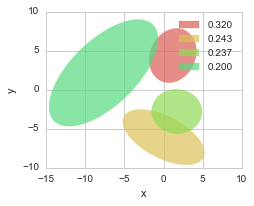

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.996  0.012      0.024  8.434835e-09      0.016       0.080

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.995  0.011      0.024  9.257928e-09      0.016       0.084

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.308   1.257   4.259  2.934  3.531   0.132
2  0.255   0.787  -6.147  4.526  3.361  -0.454
3  0.250  -6.681   1.777  7.016  6.500   0.541
4  0.186   1.705  -2.728  3.283  2.581   0.030

GMM Plot Result
0.308443816814 [[ 1.25696953  4.25852478]] [ 2.85950873  3.59165316] 162.352046308
0.255304431035 [[ 0.78730501 -6.14670324]] [ 2.75668062  4.91754096] -118.185816308
0.250372245655 [[-6.6811877   1.77708535]] [ 4.56173043  8.40613707] -49.0192242282
0.185879506497 [[ 1.70519323 -2.72771743]] [ 2.57839126  3.28526549] -86.5240229326


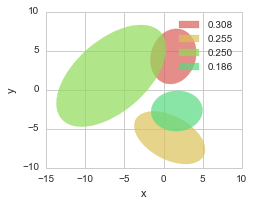

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.996  0.010      0.018  9.044124e-09      0.016       0.083

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.995  0.010      0.018  9.589650e-09      0.017       0.085


CPU times: user 687 ms, sys: 59.6 ms, total: 746 ms
Wall time: 5.83 s


In [68]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(2))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax)
    plt.show()
    
#     fig_gmm = plt.figure(figsize=(4,3))
#     mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(result['gmm'])
#     pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)
#     plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
#     align_figures()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print ''

## 6.2 Cross-validation, to select the number of Gaussian

In [69]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = zip(*CV_result)
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 24135.0 8045.0
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.176066  0.094543  3.445151e-07    0.099452     0.510524  0.831976
1    0.172589  0.093794  3.413256e-07    0.099921     0.507954  0.832708
2    0.175202  0.094579  3.486360e-07    0.099913     0.513273  0.830918
3    0.172741  0.093660  3.406450e-07    0.099166     0.507466  0.833335

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.169018  0.094263  3.435537e-07    0.100391     0.509132  0.832166
1    0.173365  0.093964  3.400088e-07    0.097131     0.507103  0.836315
2    0.178204  0.086030  3.382406e-07    0.100014     0.506055  0.831997
3    0.183213  0.102320  3.632145e-07    0.102368     0.524063  0.824264

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.447889  0.032376  5.933082e-08    0.041600     0.211915  0.970971
1    0.412912  0.033050  5.812002e-08    0.040976     0.209499  0.971705
2    0.400089  0.031979  5.433354e-08    0.039598     0.202624  0.973398
3    0.442847  0.032023  5.615197e-08    0.040036     0.206090  0.972690

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.299369  0.026480  5.606570e-08    0.039608     0.205520  0.972903
1    0.514314  0.034777  5.535093e-08    0.039917     0.204918  0.972802
2    0.546414  0.032986  6.643361e-08    0.043802     0.224282  0.967904
3    0.398415  0.038095  6.236012e-08    0.043147     0.216971  0.969282

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.036186  0.015148  1.905533e-08    0.023474     0.120045  0.990701
1    0.033880  0.014655  1.944363e-08    0.023744     0.121216  0.990553
2    0.033136  0.015192  1.886129e-08    0.023314     0.119437  0.990757
3    0.032730  0.015069  1.865224e-08    0.023147     0.118734  0.990895

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.039507  0.020473  2.437080e-08    0.026450     0.135676  0.988128
1    0.035921  0.012399  1.998800e-08    0.023856     0.123009  0.990119
2    0.037481  0.015499  2.327829e-08    0.025982     0.132582  0.988792
3    0.033410  0.014237  2.296856e-08    0.025937     0.131828  0.988808

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.025228  0.008170  7.111680e-09    0.014373     0.073301  0.996531
1    0.018375  0.011168  9.027586e-09    0.016036     0.082649  0.995632
2    0.031409  0.009270  7.867558e-09    0.015130     0.077088  0.996124
3    0.019567  0.011293  8.849990e-09    0.015974     0.081827  0.995683

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.051260  0.014377  1.182177e-08    0.018299     0.094631  0.994230
1    0.020992  0.016870  1.478448e-08    0.021077     0.105588  0.992604
2    0.033826  0.012978  1.185282e-08    0.018277     0.094795  0.994384
3    0.025315  0.013151  1.263174e-08    0.019124     0.097617  0.993831

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.016502  0.005032  2.694170e-09    0.008839     0.045129  0.998683
1    0.016986  0.007989  2.938568e-09    0.009335     0.047144  0.998568
2    0.011731  0.006883  2.126239e-09    0.007784     0.040091  0.998961
3    0.010273  0.007964  3.094903e-09    0.009364     0.048368  0.998491

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.024574  0.005430  5.276426e-09    0.012257     0.063170  0.997441
1    0.015642  0.012328  7.817523e-09    0.014438     0.076832  0.996170
2    0.018815  0.009048  6.748249e-09    0.014213     0.071442  0.996721
3    0.010293  0.008209  5.873851e-09    0.013395     0.066654  0.997124

  
Number of gaussian 6
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.007786  0.004743  1.208600e-09    0.005919     0.030218  0.999412
1    0.007596  0.004488  1.607113e-09    0.006865     0.034853  0.999208
2    0.006480  0.003365  1.403139e-09    0.006345     0.032557  0.999315
3    0.006908  0.005125  1.227671e-09    0.005912     0.030490  0.999405

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.010607  0.008394  4.827531e-09    0.011728     0.060471  0.997621
1    0.008200  0.011835  6.357283e-09    0.013235     0.069349  0.996991
2    0.012834  0.011050  7.945384e-09    0.015283     0.077594  0.996131
3    0.012700  0.013940  4.942438e-09    0.012199     0.060980  0.997542

CPU times: user 1.64 s, sys: 371 ms, total: 2.01 s
Wall time: 1min 17s


In [70]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.174149  0.094144  3.437804e-07    0.099613     0.509804  0.832234
2    0.425934  0.032357  5.698409e-08    0.040552     0.207532  0.972191
3    0.033983  0.015016  1.900312e-08    0.023420     0.119858  0.990727
4    0.023645  0.009975  8.214204e-09    0.015378     0.078716  0.995993
5    0.013873  0.006967  2.713470e-09    0.008831     0.045183  0.998676
6    0.007192  0.004430  1.361631e-09    0.006260     0.032030  0.999335

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.175950  0.094144  3.462544e-07    0.099976     0.511588  0.831186
2    0.439628  0.033084  6.005259e-08    0.041619     0.212923  0.970723
3    0.036580  0.015652  2.265141e-08    0.025556     0.130774  0.988962
4    0.032848  0.014344  1.277270e-08    0.019194     0.098158  0.993762
5    0.017331  0.008754  6.429012e-09    0.013576     0.069524  0.996864
6    0.011085  0.011305  6.018159e-09    0.013111     0.067098  0.997071

R_square


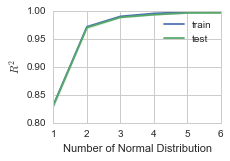

K_S


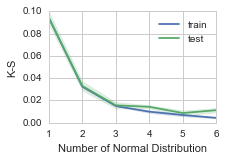

Chi_square


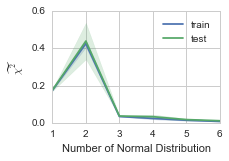

In [71]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print column
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Normal Distribution', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    plt.show()

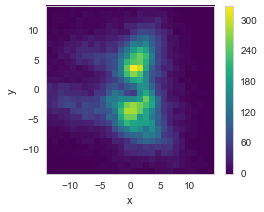

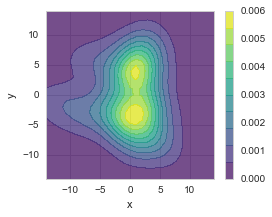

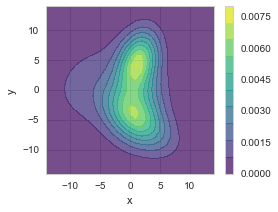

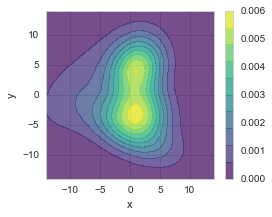

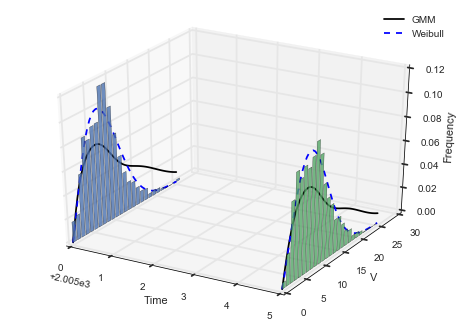

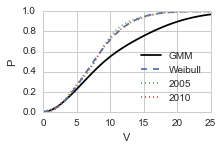

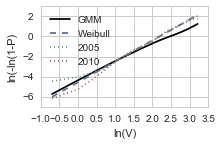

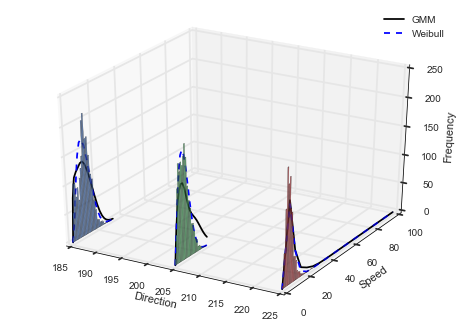

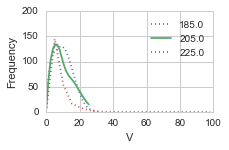

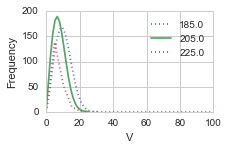

In [72]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [73]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)